### House Price Prediction Assignment:

### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company is looking at prospective properties to buy to enter the market.
Model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Objective:

This assignment is to build a regression model using regularisation in order to predict the actual value of the house property.
<br>`Target Variable: SalePrice`
<ul>
<li> Identify which variables are significant in predicting the sales price of a house, and How well those variables describe the price of a house.
<li> Also, determine the optimal value of lambda for ridge and lasso regression.
</ul>

### Importing and Understanding Data:

In [558]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

house_data = pd.read_csv("train.csv", header=0, low_memory=False)
house_data.shape

(1460, 81)

In [559]:
# Display all the columns.
pd.set_option('display.max_columns', None) 

# Looking at the first five rows
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [560]:
# Check for any outliers at 5, 15, 25, 50, 75, 90, 95, 99
house_data.describe(percentiles=[.05,.15,.25,.50,.75,.90,.95,.99], include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
5%        73.950000    20.000000      NaN    34.000000    3311.700000    NaN   
15%      219.850000    20.000000      NaN    50.000000    6120.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
90%     1314.100000   120.000000      NaN    96.000000   14381.700000    NaN   
95%     1387.050000   160.000000      NaN   107.000000   17401.150000    NaN   
99%     1445.410000   190.000000      NaN   141.000000   37567.640000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count     91     1460        1460      1460      1460      1460         1460   
unique     2        4           4         2         5         3           25   
top     Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq      50      925        1311      1459      1052      1382          225   
mean     NaN      NaN         NaN       NaN       NaN       NaN          NaN   
std      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
min      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
5%       NaN      NaN         NaN       NaN       NaN       NaN          NaN   
15%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
25%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
50%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
75%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
90%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
95%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
99%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
max      NaN      NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460  1460.000000  1460.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1260       1445     1220        726          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.099315     5.575342   
std           NaN        NaN      NaN        NaN     1.382997     1.112799   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
5%            NaN        NaN      NaN        NaN     4.000000     4.000000   
15%           NaN        NaN      NaN        NaN     5.000000     5.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
90%           NaN        NaN      NaN        NaN     8.000000     7.000000   
95%           NaN        NaN      NaN        NaN     8.000000     8.000000   
99%           NaN        NaN      NaN        NaN    10.000000     9.000000   
max           NaN        NaN      NaN        Na

#### Observations:
- The values on the columns MSSubClass and LotArea are increasing much after 75% to 90%.
- Some of the column data's seems to have outliers, need to cross check with graph visualization.
- The unique values for the object datatype columns are captured in the output so, segregated the below 25 columns which have more no of categories (unique_count>4) in it,<br>
  `MSZoning, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, ExterCond, Foundation, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, Electrical, Functional, FireplaceQu, GarageType, GarageQual, GarageCond, SaleType, SaleCondition`

In [561]:
# Filter the data based on data types first.
categorical_data = house_data.select_dtypes(include='object')
numeric_data = house_data.select_dtypes(exclude='object')

#### Visualize the data distribution in Categorical columns.

In [562]:
categorical_data.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [563]:
len(categorical_data.columns)

43

In [683]:
import math
def plotGraph(input_df, typeVal=0):
    size = input_df.shape[1]
    height=math.ceil(size/5)
    fig, axs = plt.subplots(height, 5, figsize=(25, (height*5)))
    xcount=0
    ycount=0
    for val in input_df.columns:
        if(typeVal==2):
            sns.boxplot(data=input_df, x=val, ax=axs[xcount, ycount])
        elif(typeVal==1):
            sns.barplot(x=input_df[val].value_counts().index, y=input_df[val].value_counts(), ax=axs[xcount, ycount])
        else:
            sns.histplot(data=input_df, x=val, kde=True, ax=axs[xcount, ycount])
        ycount+=1
        if(ycount==5):
            ycount=0
            xcount+=1

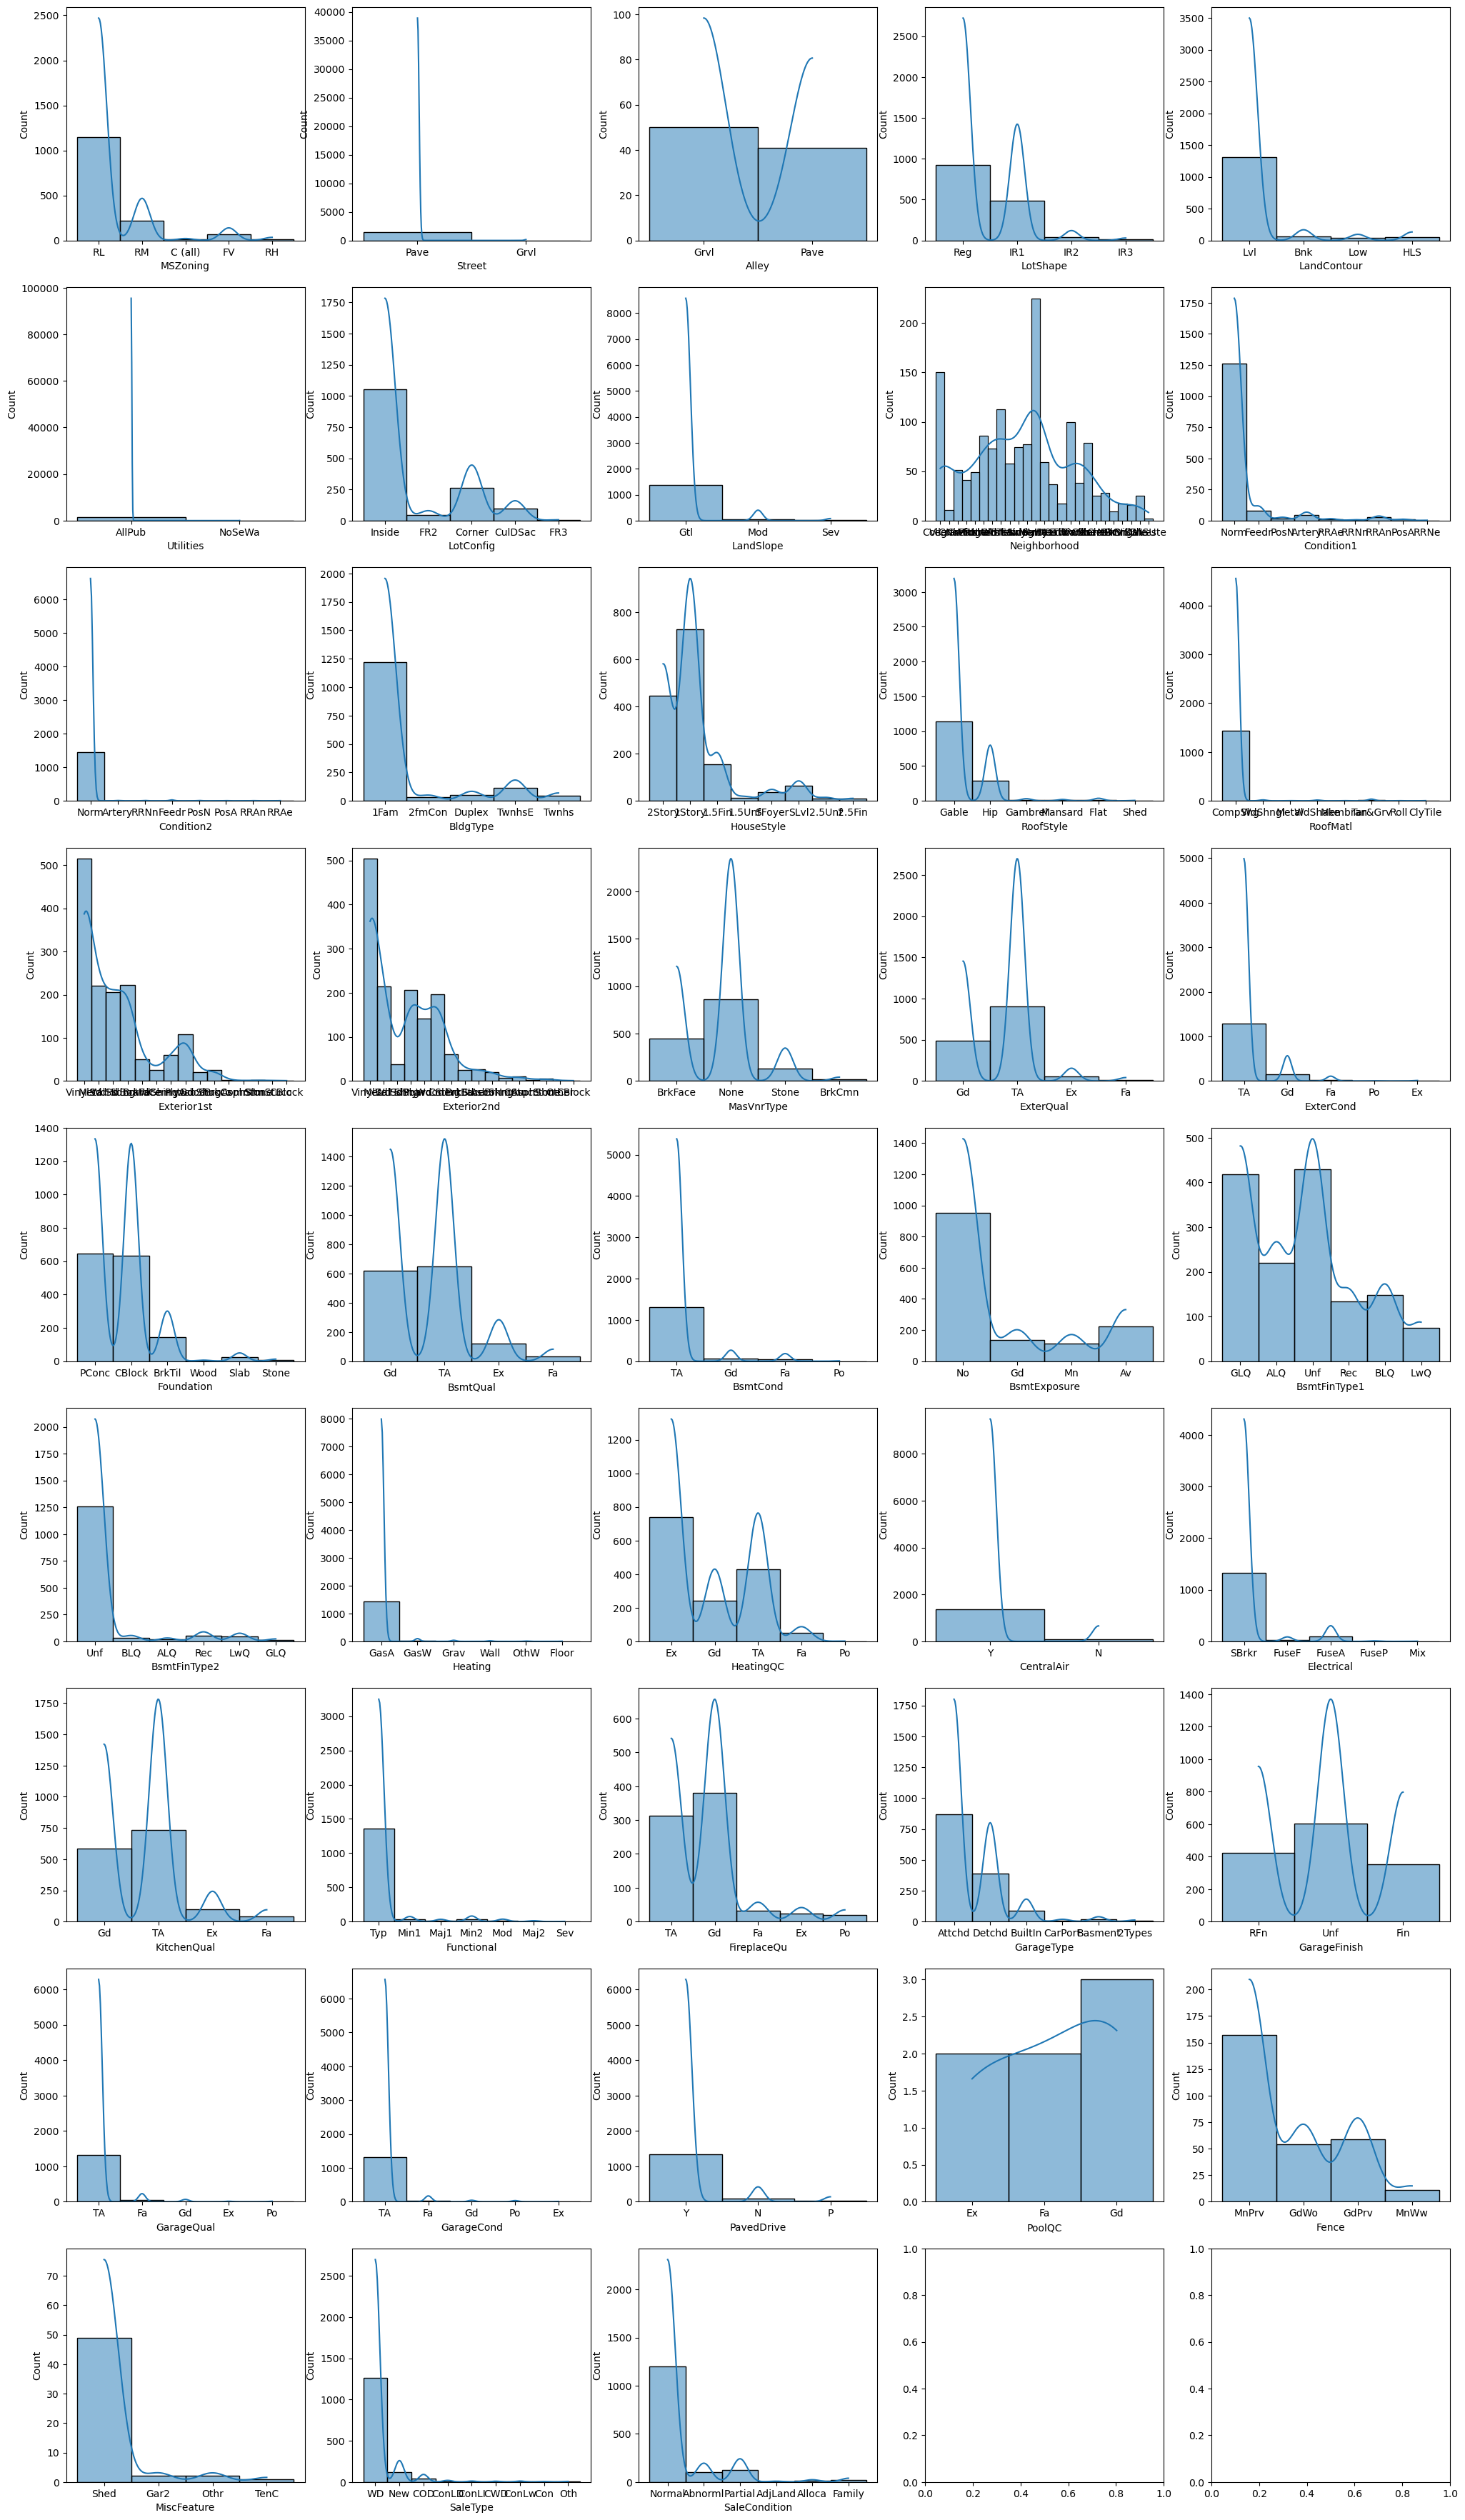

In [565]:
# Check the data distribution of the categorical variables.
plotGraph(categorical_data)

#### Observations:
- Only for the below mentioned few of the 18 columns out of 43, the data's are distributed among different categories/values.
  Alley, Neighborhood, HouseStyle, Exterior1st, Exterior2nd, MasVnrType, ExterQual, Foundation, BsmtQual, BsmtExposure, BsmtFinType1, HeatingQC, KitchenQual, FireplaceQu, GarageType, GarageFinish, PoolQC, Fence.
  
- The Remaining 25 columns doesn't have the values are distributed - It's having single value dominance.

#### Visualize the Numerical data distribution

In [566]:
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

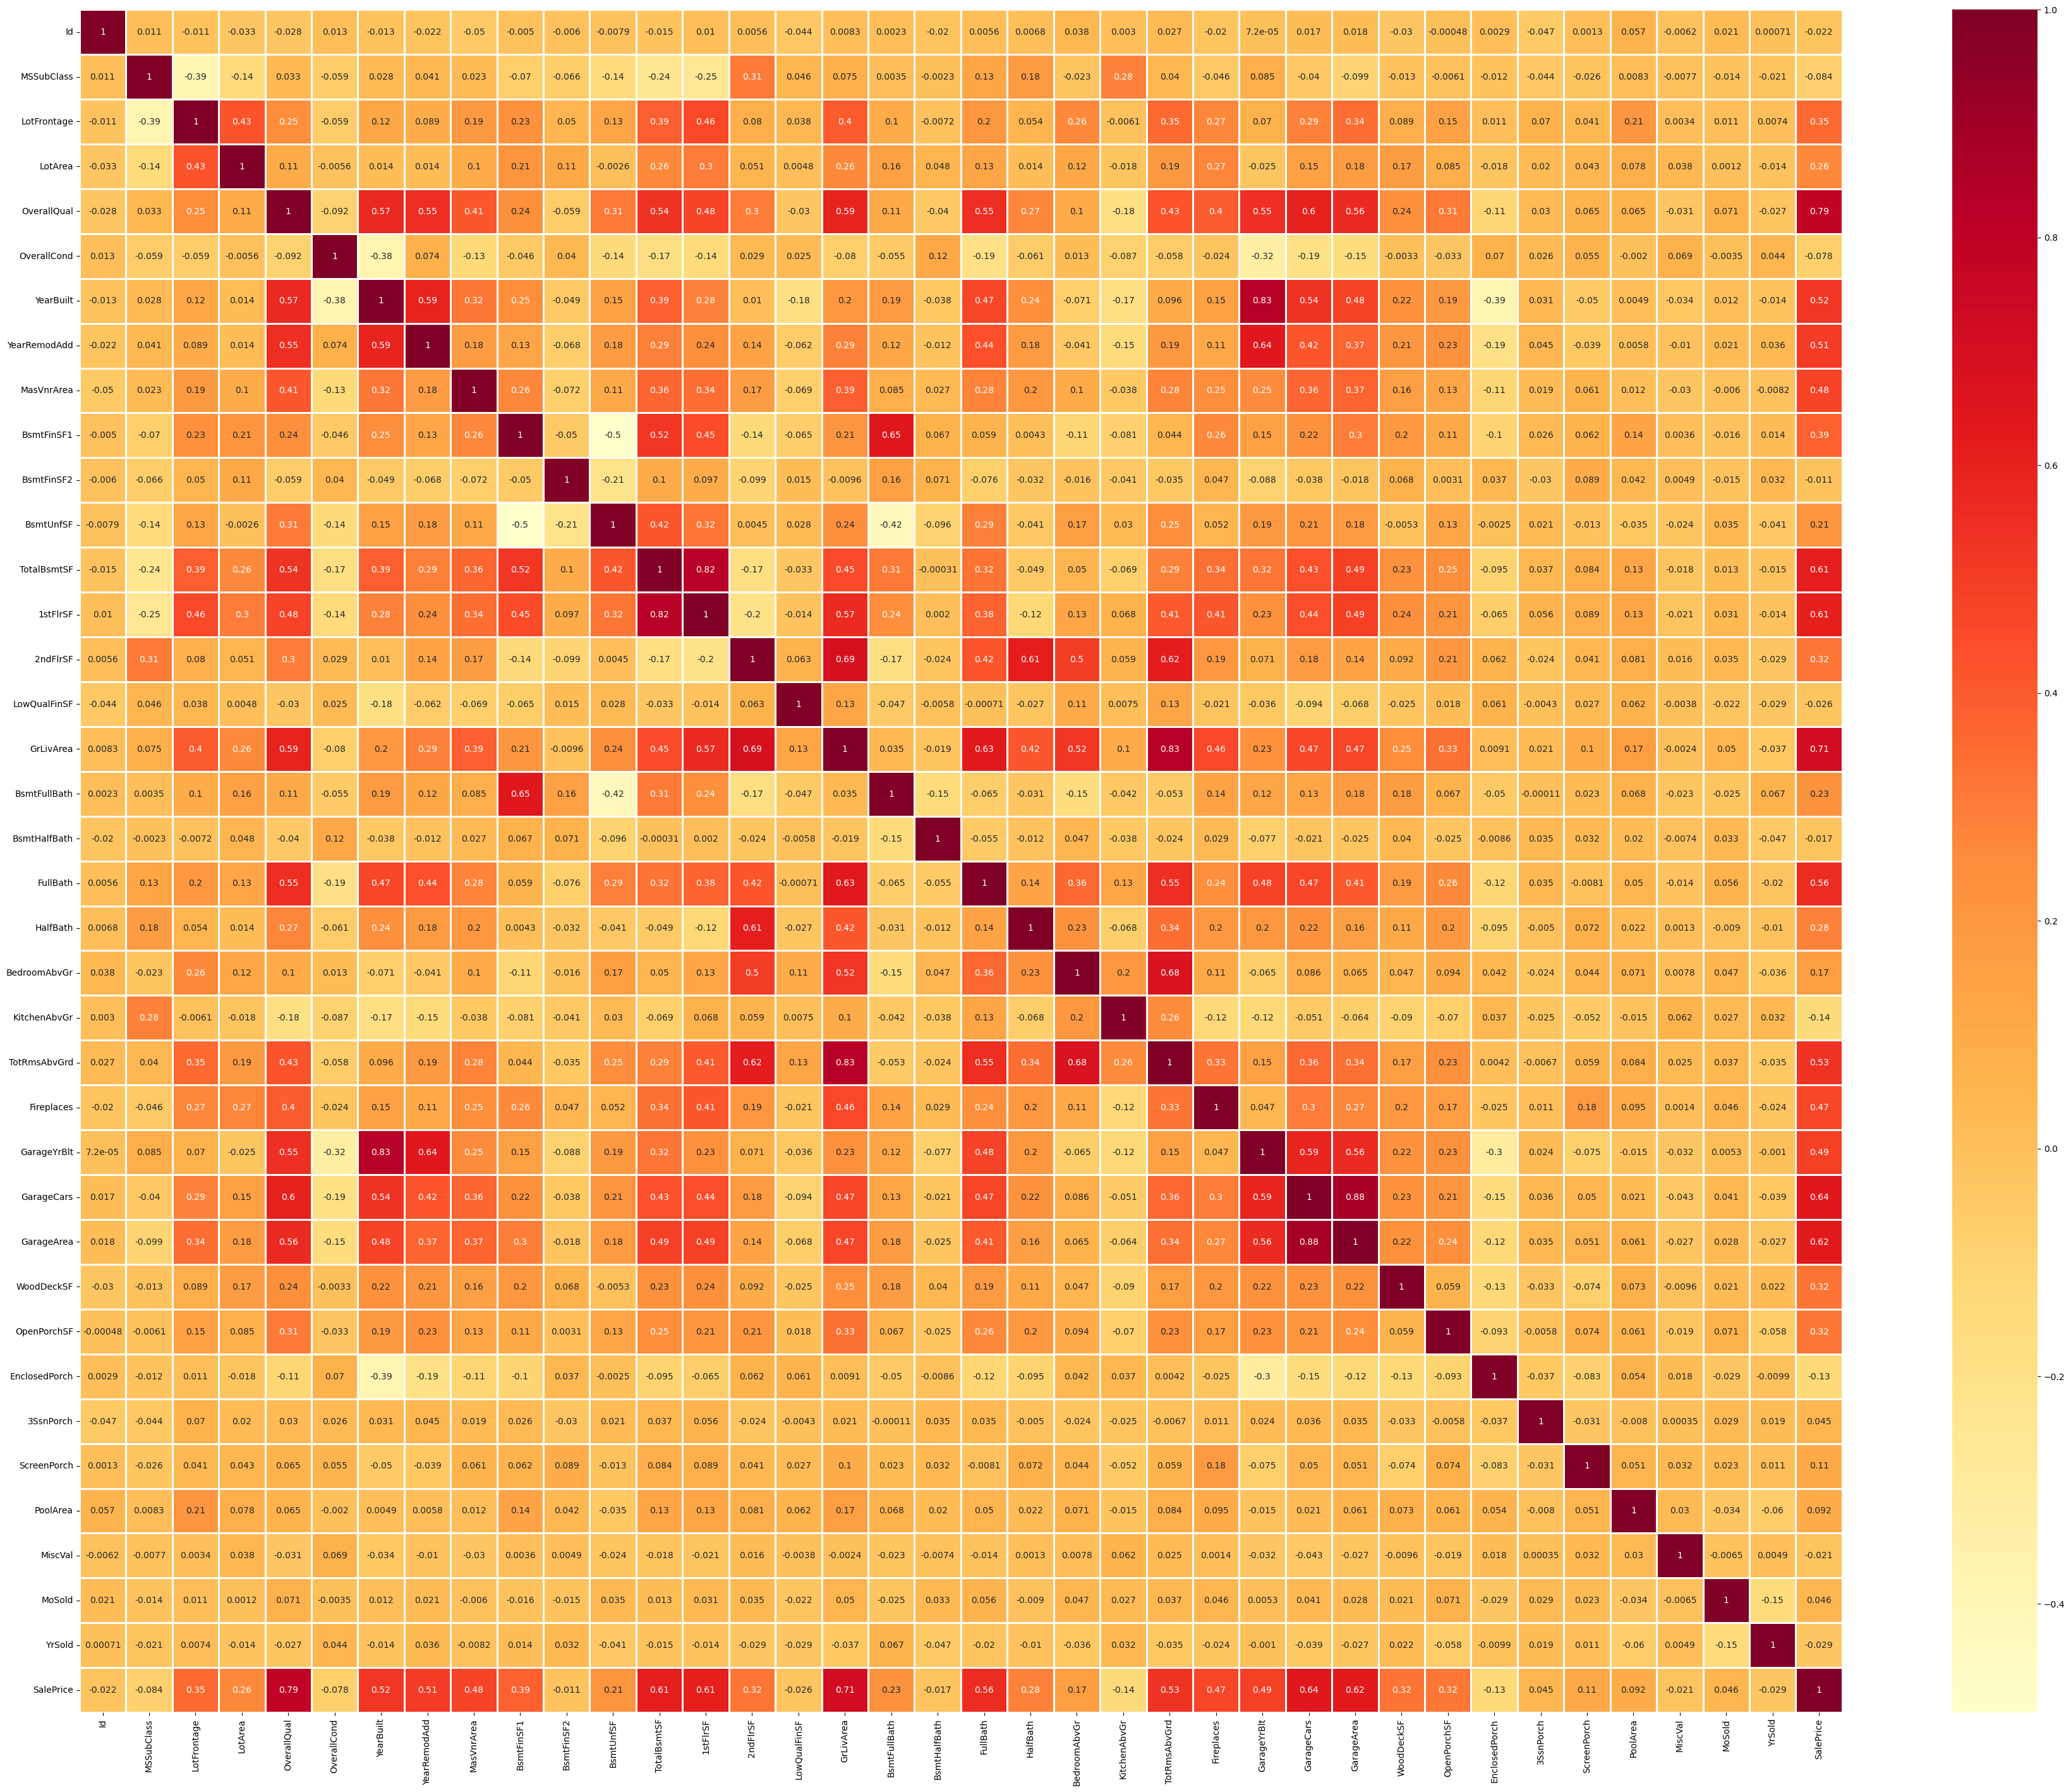

In [567]:
# Plot the heatmap for Correlation
fig, axes = plt.subplots(figsize=(45,35))
sns.heatmap(numeric_data.corr(), annot=True,linewidth=1,cmap="YlOrRd", ax=axes)
plt.show()

#### Observations:
The below mentioned 8 columns are correlated (DIFF of 0.6 (or) more) with other variables.

GarageCars, GarageYrBlt, BsmtFullBath, 1stFlrSF, 2ndFlrSF, FullBath, TotRmsAbvGrd, BsmtFinSF1.

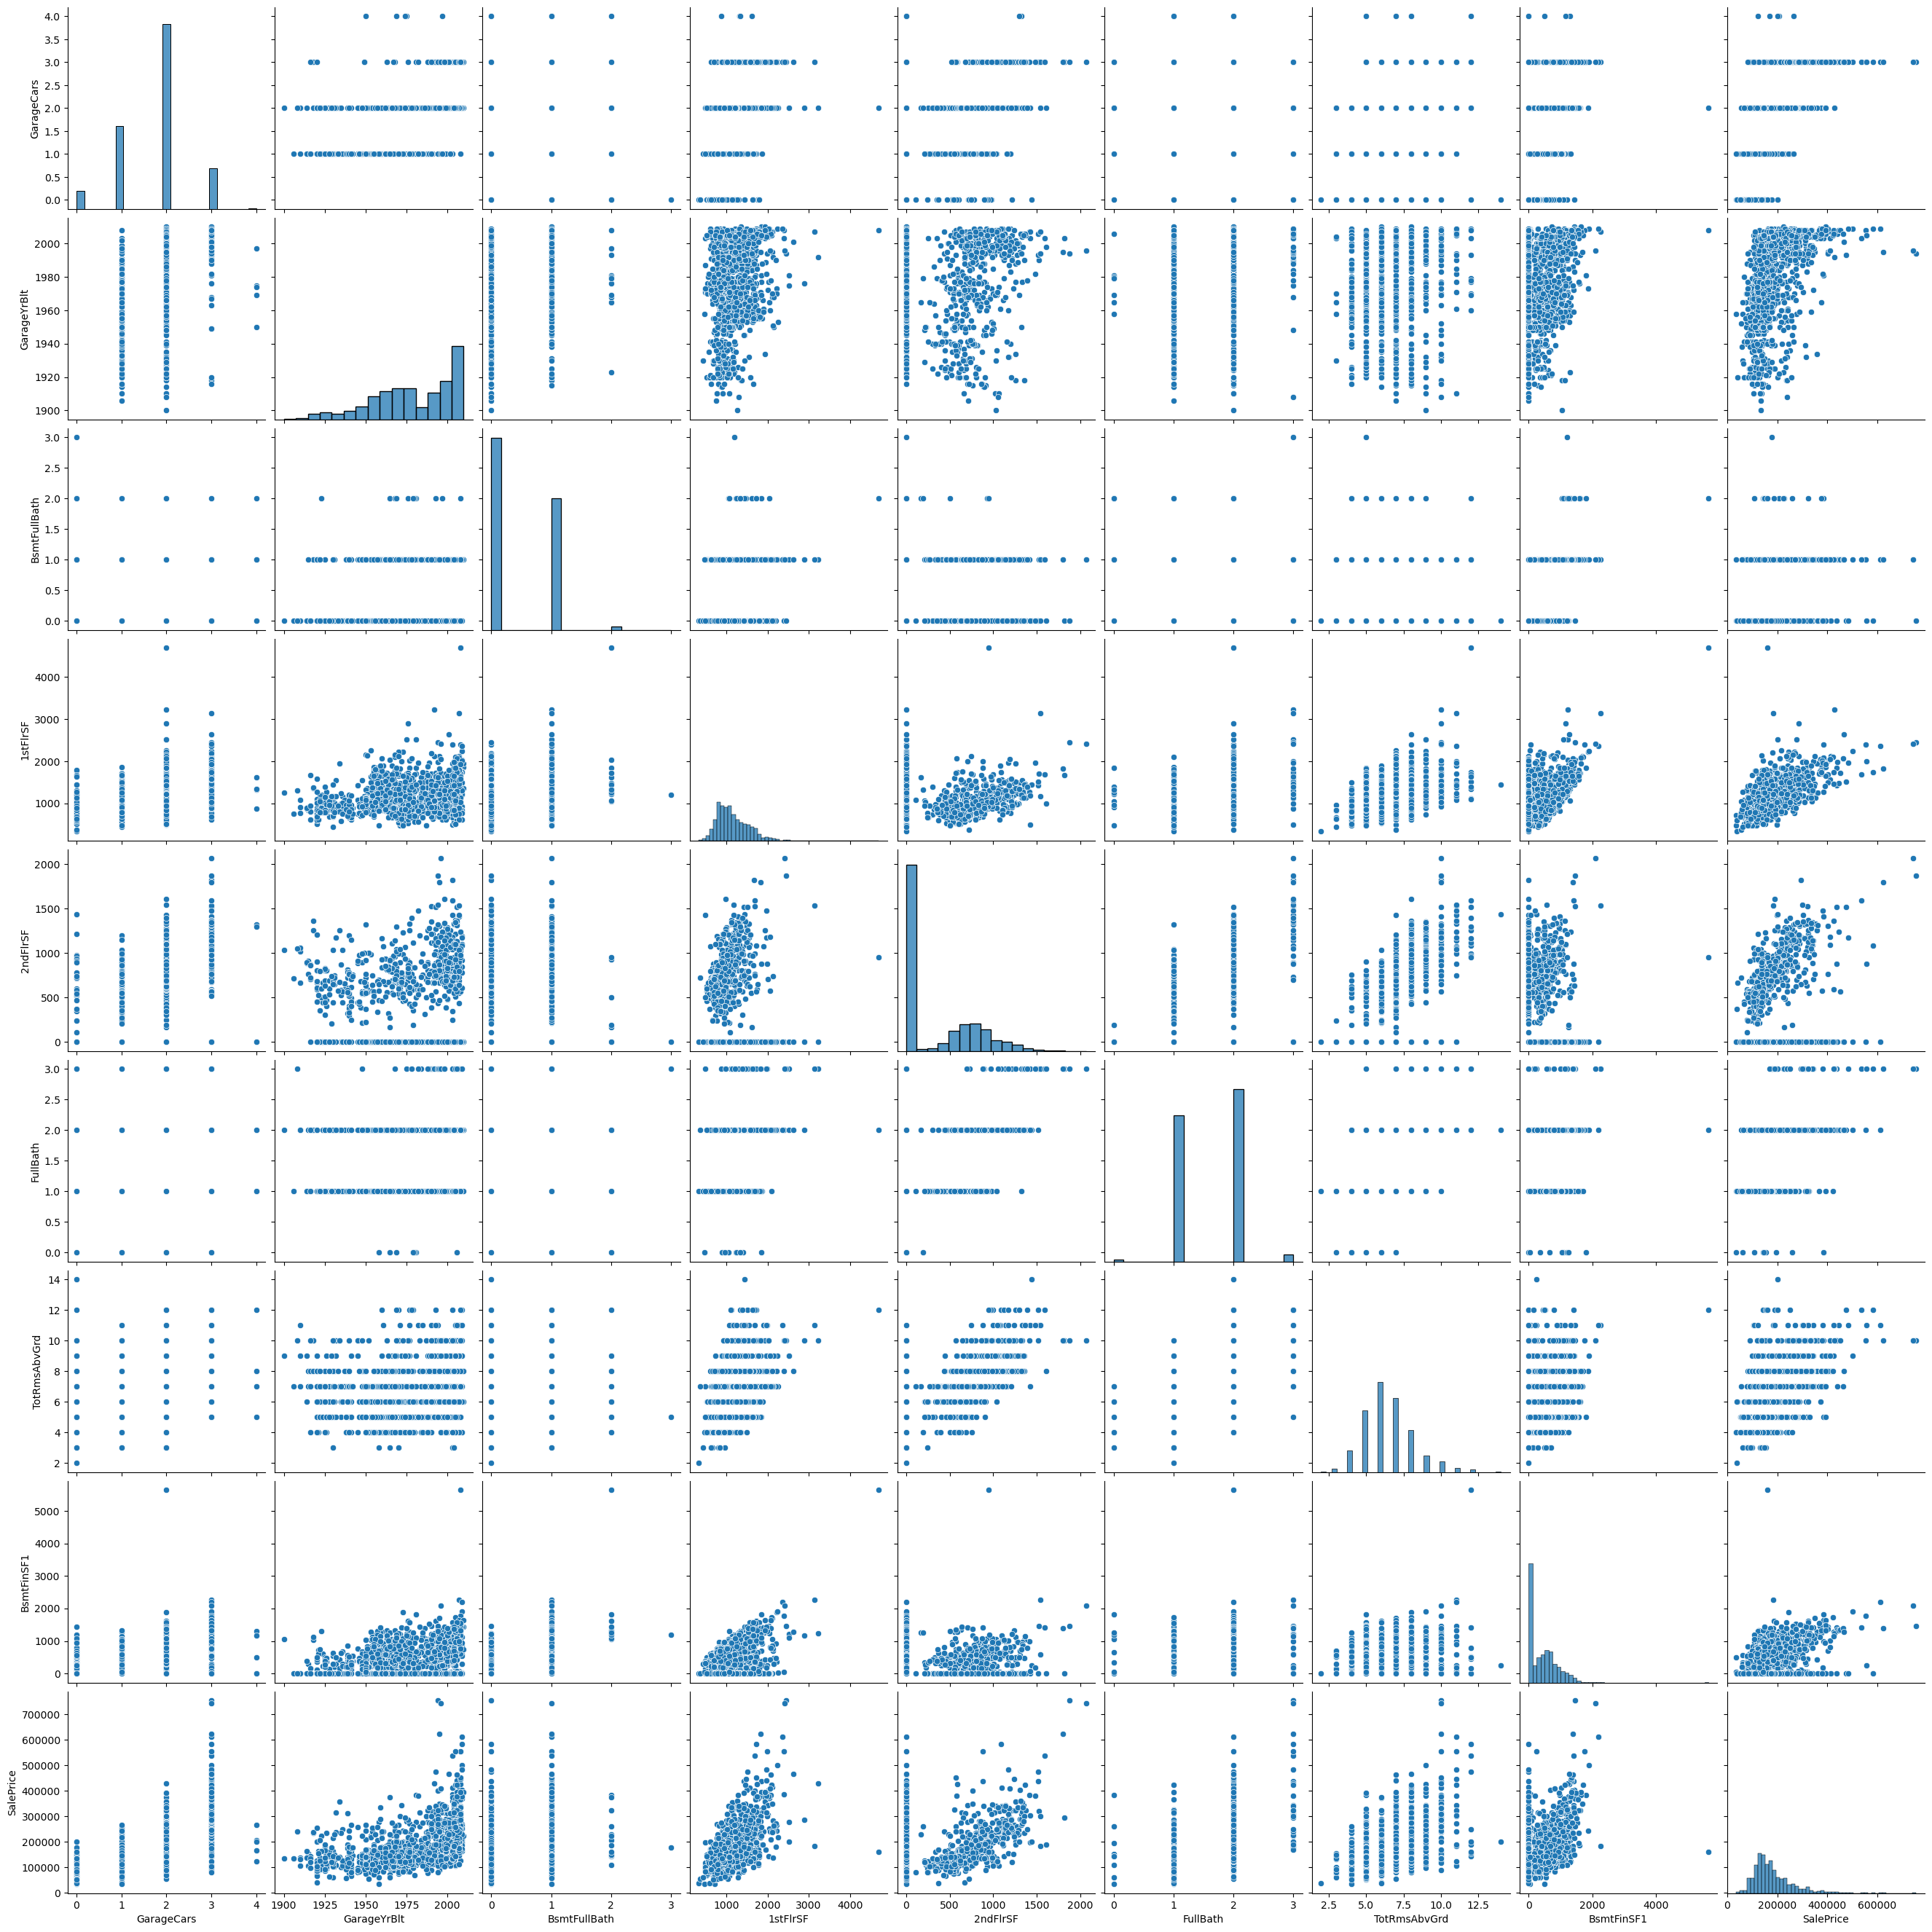

<Figure size 7000x8000 with 0 Axes>

In [568]:
# Now, we need to see the distribution of each of the columns to make sure it is NOT contributing any value to SalesPrice target variable.
# Also, the importance of this variable by adding value to target variable 'SalesPrice individually.
# Based on that, we can drop these columns from dataset.
sns.pairplot(numeric_data[['GarageCars', 'GarageYrBlt', 'BsmtFullBath', '1stFlrSF', '2ndFlrSF', 'FullBath', 'TotRmsAbvGrd', 'BsmtFinSF1','SalePrice']],size=3)
plt.figure(figsize=(70, 80))
plt.show()

#### Observations:

Bivariate Analysis of all the numerical columns against sales price column which help to decide whether the columns are contributing much in sales price prediction or not.

The below mentioned 8 columns are not seems to be much contributed for sales prediction.

GarageCars, GarageYrBlt, BsmtFullBath, 1stFlrSF, 2ndFlrSF, FullBath, TotRmsAbvGrd, BsmtFinSF1.

### Data Cleaning

#### - Filter and drop the columns where the data loss percentage is more than 70%.

In [569]:
# Filter the NA / NULL columns for the entire dataset.

house_data_na = house_data.isna().sum().reset_index()
house_data_na = house_data_na[house_data_na[0]>0]

# Display the percentage of data loss for the appropirate columns.
house_data_na['DataLossPercent'] = (house_data_na[0]/house_data.shape[0]) * 100

# Filter the columns if the data loss is more than 70%.
house_data_na[house_data_na.DataLossPercent>70]

index     0  DataLossPercent
6         Alley  1369        93.767123
72       PoolQC  1453        99.520548
73        Fence  1179        80.753425
74  MiscFeature  1406        96.301370

In [570]:
# Drop all the 4 columns from the housing dataset which have more than 70% of entries are NA or NULL values..
# Alley, PoolQC, Fence, MiscFeature

house_data = house_data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

#### - Filter and drop the unique columns.

In [571]:
# Check for the columns where all the values are unique.
house_data_unique = house_data.nunique().reset_index()
house_data_unique[house_data_unique[0]==house_data.shape[0]]


index     0
0    Id  1460

In [572]:
# Drop the unique column 'Id' from the housing dataset which doesn't contribute value to target variable 'SalesPrice'

house_data = house_data.drop(['Id'], axis=1)
house_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

#### - Filter and drop the columns where the percentage of value=0 is more than 80%.

In [573]:
zero_count_df = house_data[house_data == 0].count(axis=0)
zero_count_df = zero_count_df.apply(lambda x: (x/house_data.shape[0])*100)
zero_count_df[zero_count_df>80]

BsmtFinSF2       88.561644
LowQualFinSF     98.219178
BsmtHalfBath     94.383562
EnclosedPorch    85.753425
3SsnPorch        98.356164
ScreenPorch      92.054795
PoolArea         99.520548
MiscVal          96.438356
dtype: float64

In [574]:
# Drop all the 8 columns from the housing dataset which have more than 80% of entries are zero.
# BsmtFinSF2, LowQualFinSF, BsmtHalfBath, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal

house_data = house_data.drop(['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1)
house_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       'YrSold', 'SaleType

#### - Drop the numeric columns which are not contributed much on 'SalesPrice' target variable.

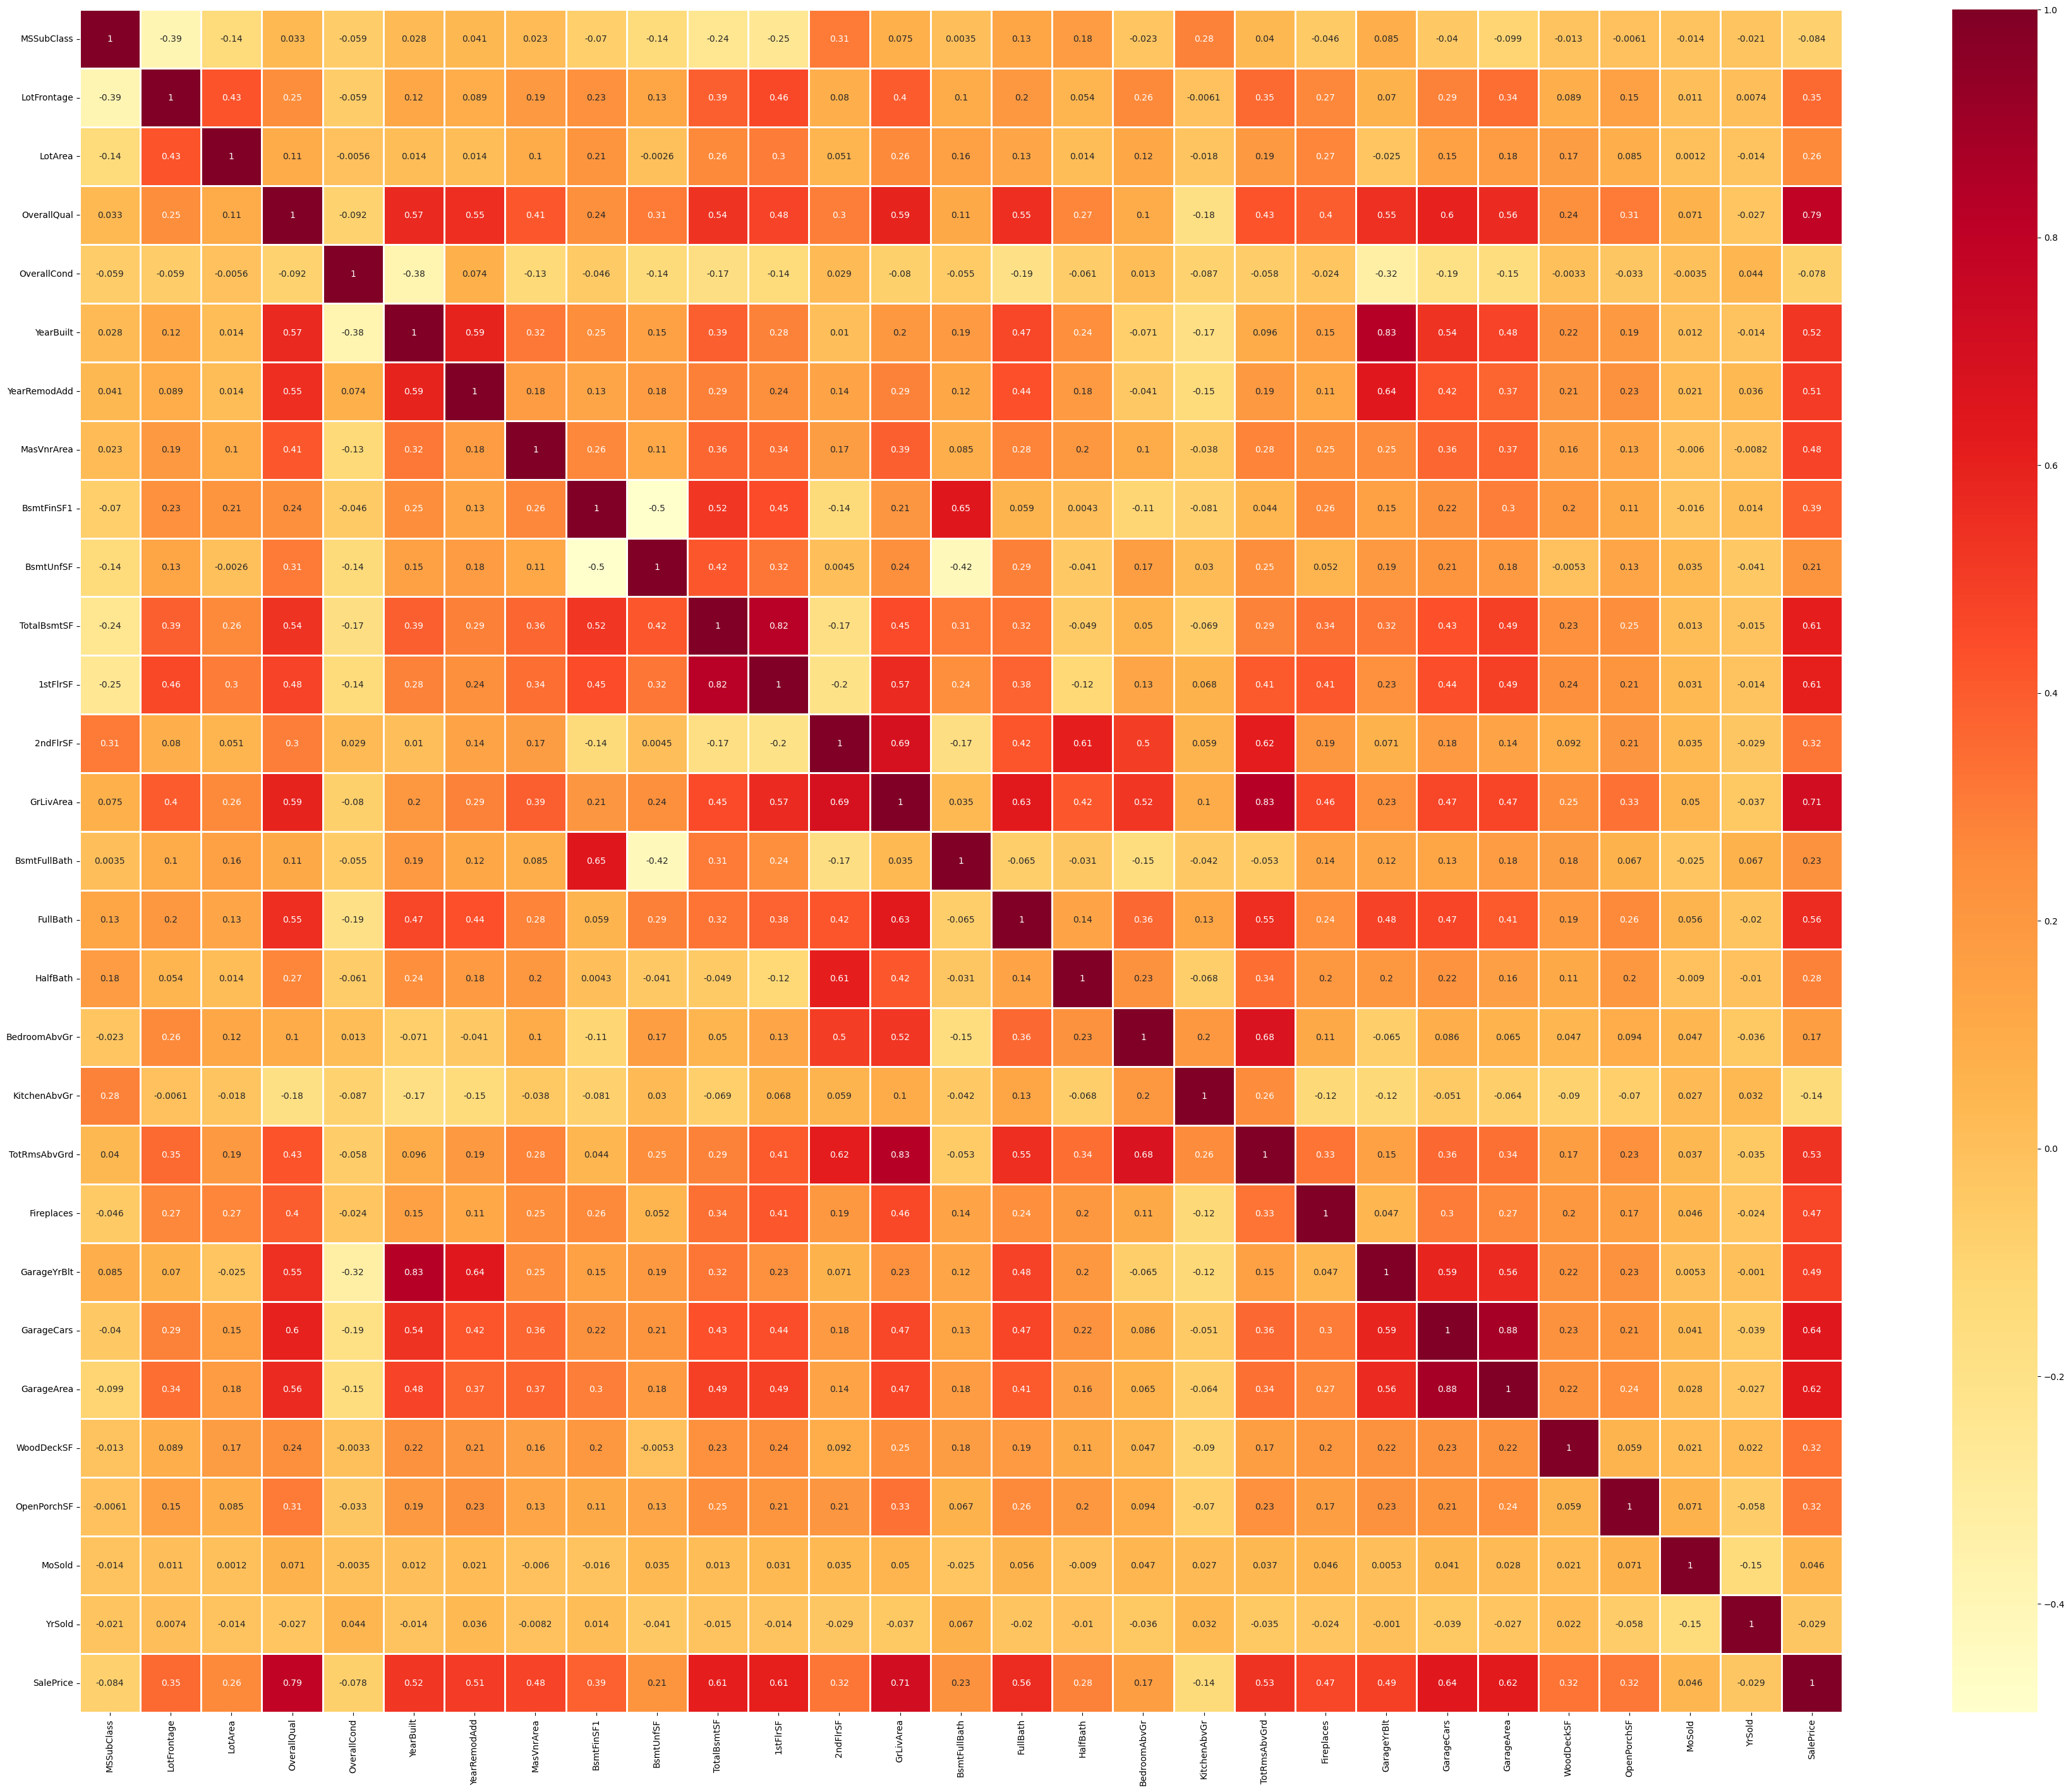

In [575]:
# Check the heat map for any co-relations for numerical variables against target variable SalesPrice.
numeric_data = house_data.select_dtypes(exclude='object')
fig, axes = plt.subplots(figsize=(45,35))
sns.heatmap(numeric_data.corr(), annot=True,linewidth=1,cmap="YlOrRd", ax=axes)
plt.show()

##### Re-validated the below 8 columns got from previous visualization which are filtered as not contributing columns on Predictor variable.
`GarageCars, GarageYrBlt, BsmtFullBath, 1stFlrSF, 2ndFlrSF, FullBath, TotRmsAbvGrd, BsmtFinSF1.`
<br>Even after initial cleaning, the heatmap shows same set of columns (except BsmtFinSF1) which are not contributed on target variable SalePrice.
<br>`GarageCars, GarageYrBlt, BsmtFullBath, 1stFlrSF, 2ndFlrSF, FullBath, TotRmsAbvGrd.`

In [576]:
# Hence, Drop the 7 Numeric columns which doesn't contributed individually much for the SalesPrice target variable.
house_data = house_data.drop(['GarageCars', 'GarageYrBlt', 'BsmtFullBath', '1stFlrSF', '2ndFlrSF', 'FullBath', 'TotRmsAbvGrd'], axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
0          Unf        150          856    GasA        Ex          Y   
1          Unf        284         1262    GasA        Ex          Y   
2          Unf        434          920    GasA        Ex          Y   
3          Unf        540          756    GasA        Gd          Y   
4          Unf        490         1145    GasA        Ex          Y   

  Electrical  GrLivArea  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0      SBrkr       1710         1             3             1          Gd   
1      SBrkr       1262         0             3             1          TA   
2      SBrkr       1786         1             3             1          Gd   
3      SBrkr       1717         0             3             1          Gd   
4      SBrkr       2198         1             4             1          Gd   

  Functional  Fireplaces FireplaceQu GarageType GarageFinish  GarageArea  \
0        Typ           0         NaN     Attchd          RFn         548   
1        Typ           1          TA     Attchd          RFn         460   
2        Typ           1          TA     Attchd          RFn         608   
3        Typ           1          Gd     Detchd          Unf         642   
4        Typ           1          TA     Attchd          RFn         836   

  GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  MoSold  YrSold  \
0         TA         TA          Y           0           61       2    2008   
1         TA         TA          Y         298            0       5    2007   
2         TA         TA          Y           0           42       9    2008   
3         TA         TA  

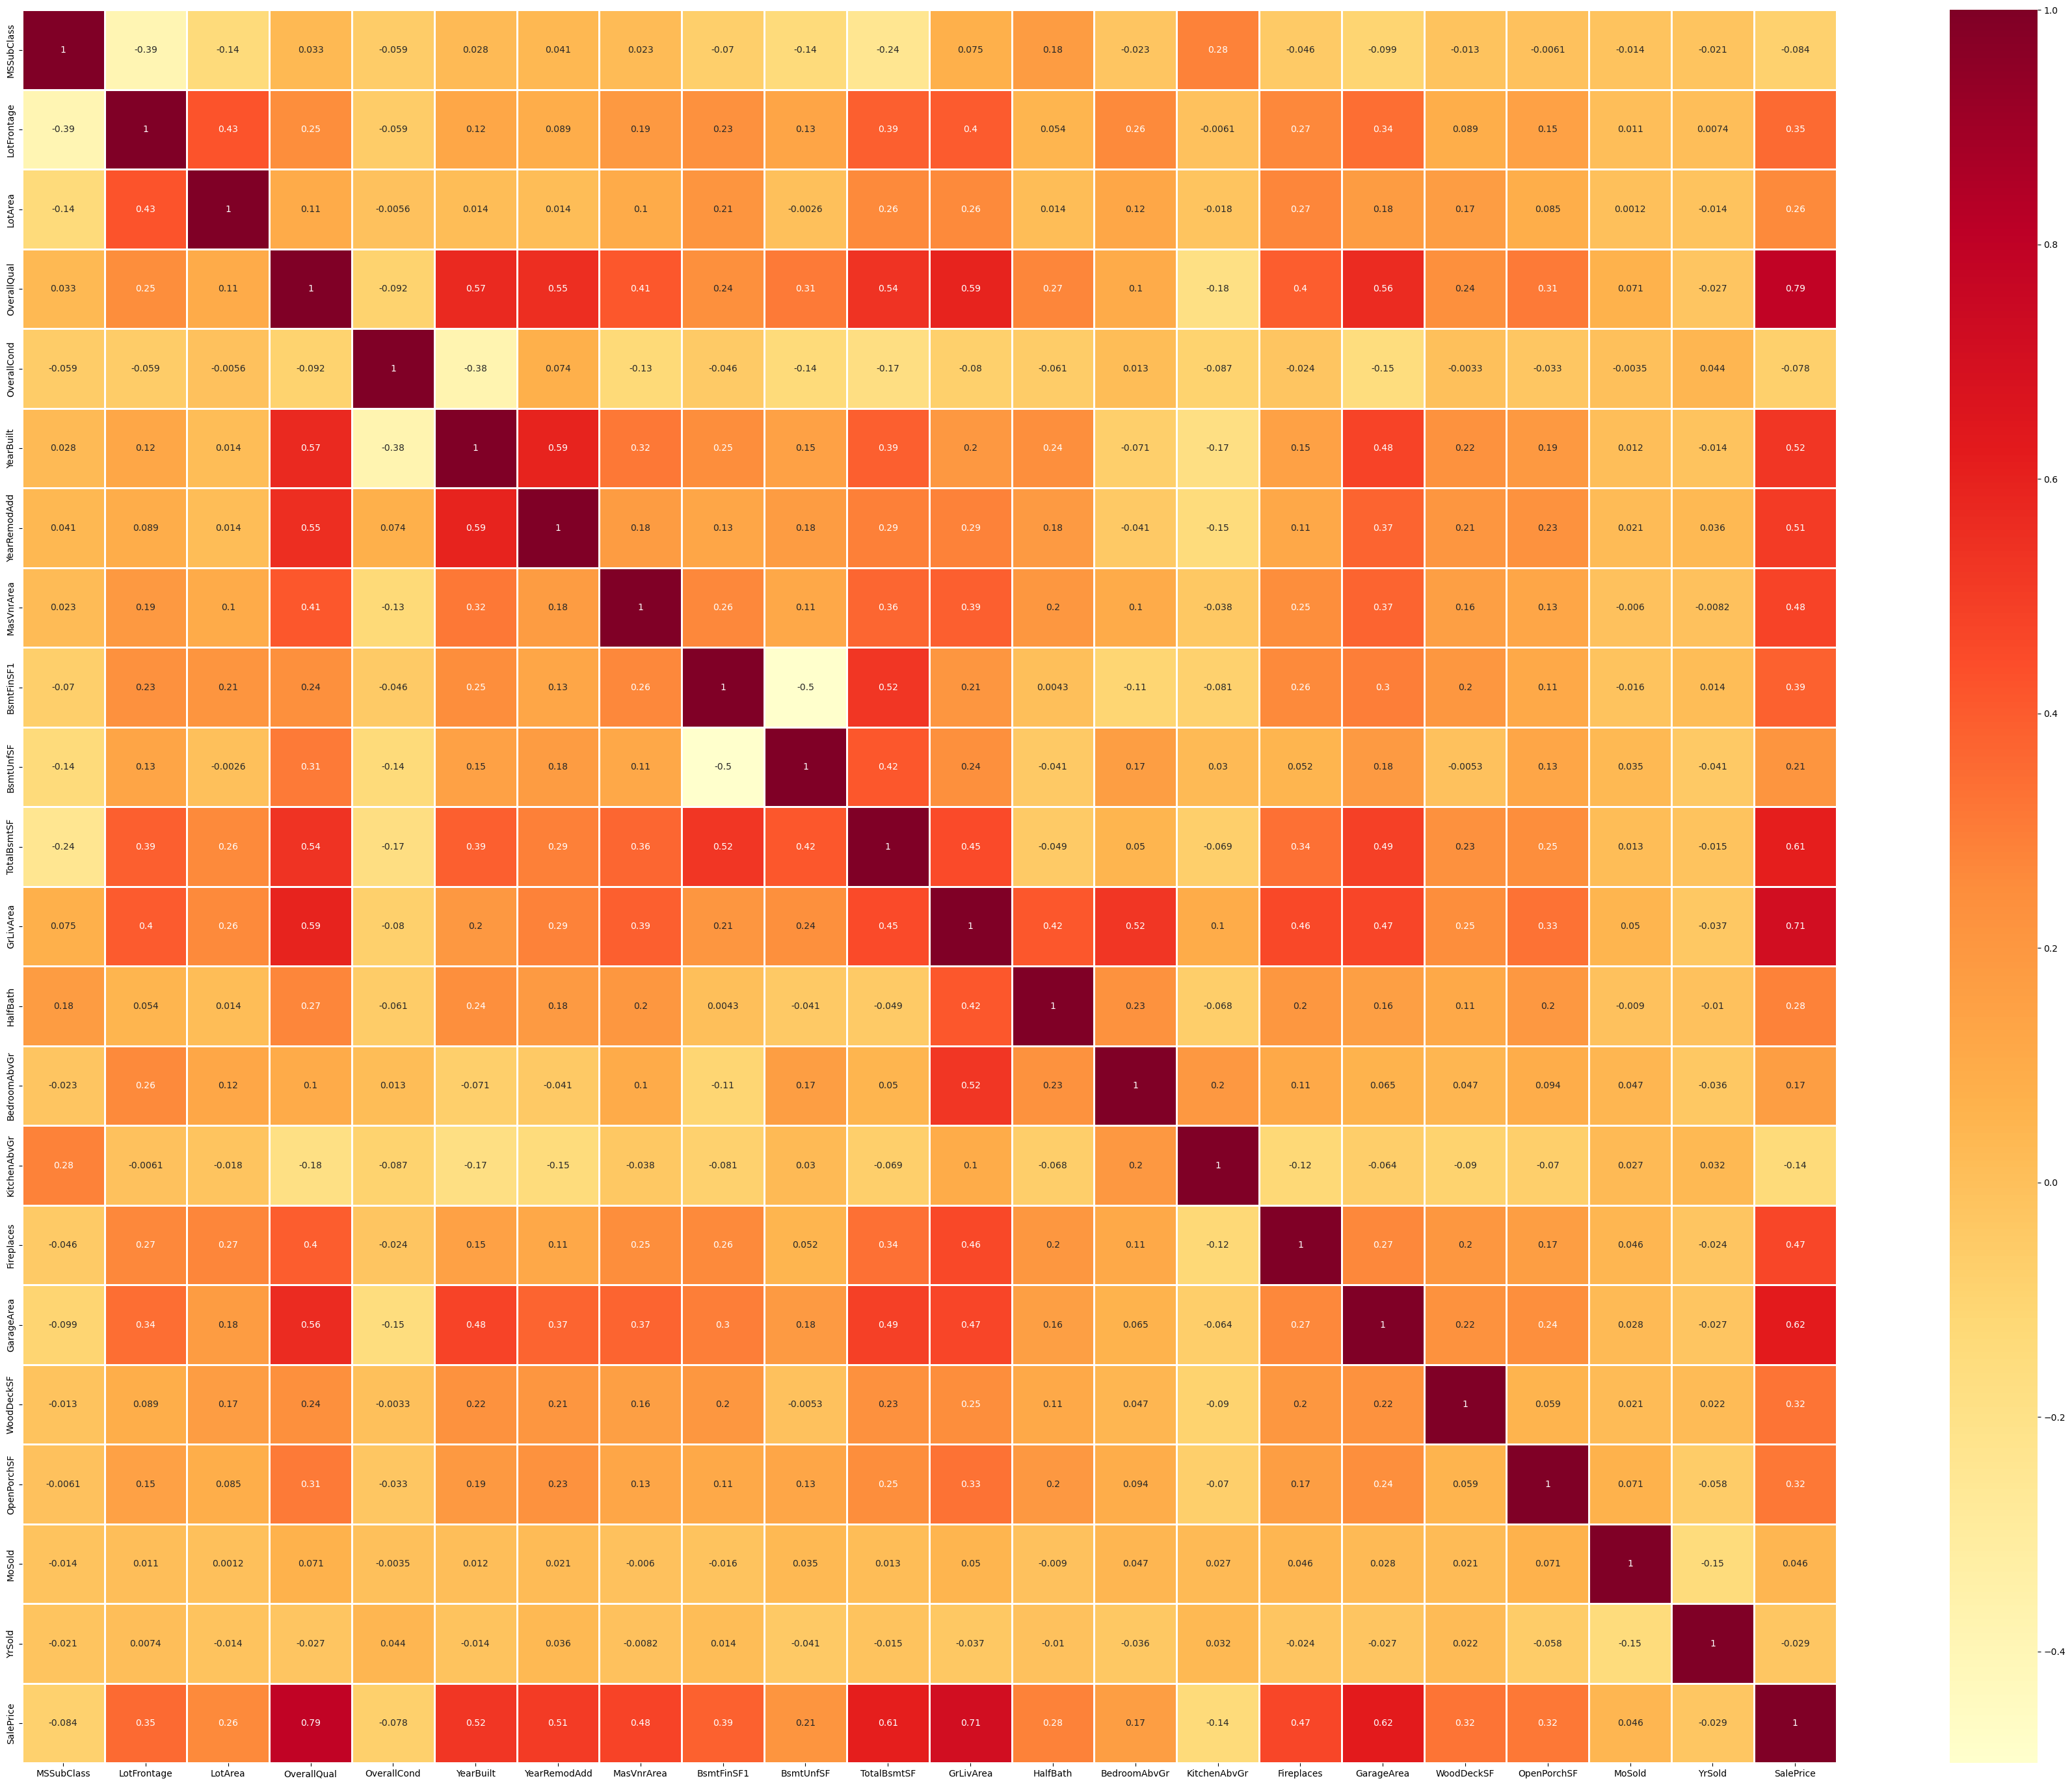

In [577]:
# Again, check the heat map for any co-relations for double confirmation.
numeric_data = house_data.select_dtypes(exclude='object')
fig, axes = plt.subplots(figsize=(45,35))
sns.heatmap(numeric_data.corr(), annot=True,linewidth=1,cmap="YlOrRd", ax=axes)
plt.show()

#### `Observation: The heatmap shows less Correlation when compare with previous result.`

#### - Checking the skewness for the numerical columns and remove the outliers in the data.

In [578]:
# Checking for the skewness (the values between -1 and +1 indicates normal distribution)
# Let's check for the values between -2 and +2 to avoid more data loss.
house_data.skew()

MSSubClass       1.407657
LotFrontage      2.163569
LotArea         12.207688
OverallQual      0.216944
OverallCond      0.693067
YearBuilt       -0.613461
YearRemodAdd    -0.503562
MasVnrArea       2.669084
BsmtFinSF1       1.685503
BsmtUnfSF        0.920268
TotalBsmtSF      1.524255
GrLivArea        1.366560
HalfBath         0.675897
BedroomAbvGr     0.211790
KitchenAbvGr     4.488397
Fireplaces       0.649565
GarageArea       0.179981
WoodDeckSF       1.541376
OpenPorchSF      2.364342
MoSold           0.212053
YrSold           0.096269
SalePrice        1.882876
dtype: float64

##### The skew value for the below 5 columns are out of the accepted range so, removing the outliers for these columns.

`LotFrontage, LotArea, MasVnrArea, KitchenAbvGr, OpenPorchSF.`

In [579]:
# Method to remove the outliers presented in the dataset.

def removeOutliers(dataset, columnsList):
    for column in columnsList:
        lower_percentile = dataset[column].quantile(0.25)
        upper_percentile = dataset[column].quantile(0.75)
        #print("lower_percentile",lower_percentile,"upper_percentile",upper_percentile)
        if(upper_percentile==lower_percentile):
            iqr = upper_percentile
        else:
            iqr = upper_percentile - lower_percentile
        lower_whisker = lower_percentile-(1.5*iqr) 
        upper_whisker = upper_percentile+(1.5*iqr)
        #print("lower_whisker",lower_whisker,"upper_whisker",upper_whisker)
        dataset[column] = dataset[(dataset[column]>lower_whisker) & (dataset[column]<upper_whisker)][column]

In [580]:
# Remove the outliers for the list of 5 columns.
columns_outliers = list(['LotFrontage', 'LotArea', 'MasVnrArea', 'KitchenAbvGr', 'OpenPorchSF'])
removeOutliers(house_data,columns_outliers)

In [581]:
house_data.skew()

MSSubClass      1.407657
LotFrontage     0.101808
LotArea        -0.074955
OverallQual     0.216944
OverallCond     0.693067
YearBuilt      -0.613461
YearRemodAdd   -0.503562
MasVnrArea      1.434685
BsmtFinSF1      1.685503
BsmtUnfSF       0.920268
TotalBsmtSF     1.524255
GrLivArea       1.366560
HalfBath        0.675897
BedroomAbvGr    0.211790
KitchenAbvGr    4.227385
Fireplaces      0.649565
GarageArea      0.179981
WoodDeckSF      1.541376
OpenPorchSF     1.154300
MoSold          0.212053
YrSold          0.096269
SalePrice       1.882876
dtype: float64

#### `Observation: The skewness is better now when compare with previous result.`

#### - Visualizing the categorical variables distribution.

In [582]:
# Checking the Categorical variables.
categorical_data = house_data.select_dtypes(include='object')
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

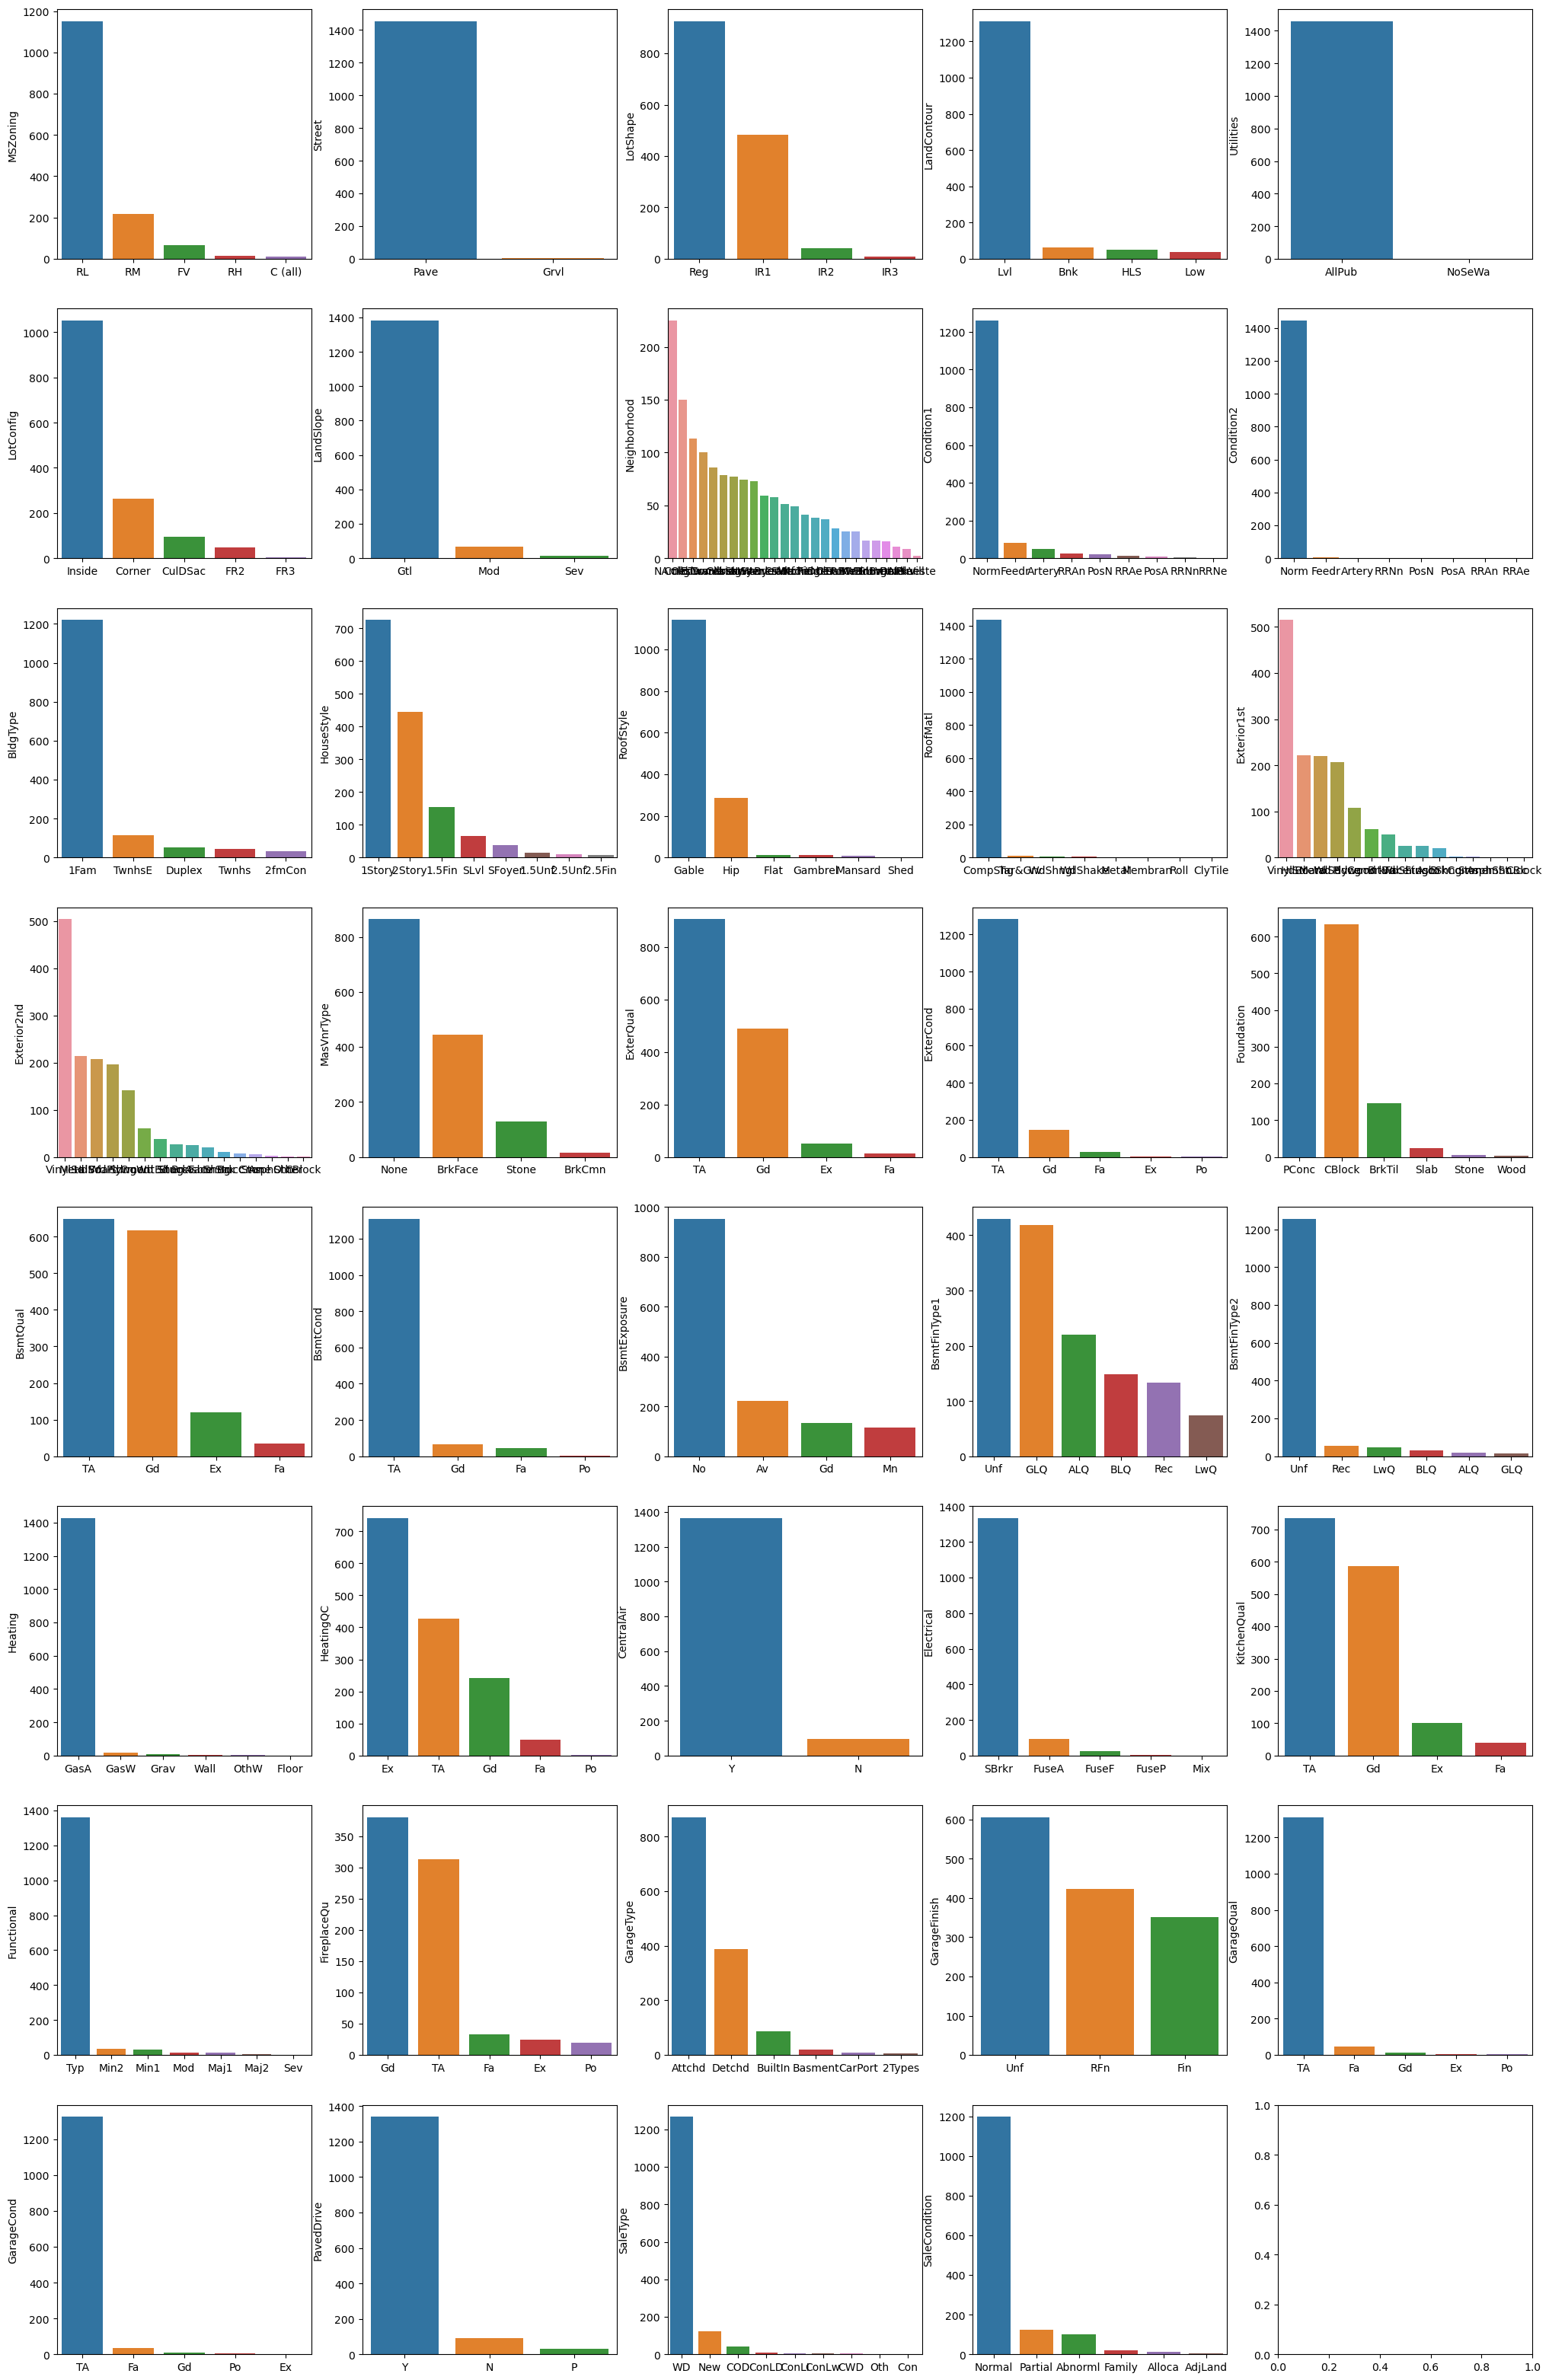

In [583]:
plotGraph(categorical_data, typeVal=1) # Bar chart for the value counts to identify the ditribution.

#### Observations:
- The data's are not distributed evenly in the below mentioned 13 columns - It's having single value dominance.

`Street, LandContour, Utilities, LandSlope, Condition1, Condition2, RoofMatl, BsmtCond, BsmtFinType2, Heating, Functional, GarageQual, GarageCond.`

#### - Droping these 13 categorical columns which are not contributed much on 'SalesPrice' target variable.

In [584]:
house_data = house_data.drop(['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'BsmtCond', 'BsmtFinType2', 'Heating', 'Functional', 'GarageQual', 'GarageCond'], axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0   8450.0      Reg    Inside      CollgCr   
1          20       RL         80.0   9600.0      Reg       FR2      Veenker   
2          60       RL         68.0  11250.0      IR1    Inside      CollgCr   
3          70       RL         60.0   9550.0      IR1    Corner      Crawfor   
4          60       RL         84.0  14260.0      IR1       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     1Fam     2Story            7            5       2003          2003   
1     1Fam     1Story            6            8       1976          1976   
2     1Fam     2Story            7            5       2001          2002   
3     1Fam     2Story            7            5       1915          1970   
4     1Fam     2Story            8            5       2000          2000   

  RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable     MetalSd     MetalSd       None         0.0        TA   
2     Gable     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable     VinylSd     VinylSd    BrkFace       350.0        Gd   

  ExterCond Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  \
0        TA      PConc       Gd           No          GLQ         706   
1        TA     CBlock       Gd           Gd          ALQ         978   
2        TA      PConc       Gd           Mn          GLQ         486   
3        TA     BrkTil       TA           No          ALQ         216   
4        TA      PConc       Gd           Av          GLQ         655   

   BsmtUnfSF  TotalBsmtSF HeatingQC CentralAir Electrical  GrLivArea  \
0        150          856        Ex          Y      SBrkr       1710   
1        284         1262        Ex          Y      SBrkr       1262   
2        434          920        Ex          Y      SBrkr       1786   
3        540          756        Gd          Y      SBrkr       1717   
4        490         1145        Ex          Y      SBrkr       2198   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  Fireplaces FireplaceQu  \
0         1             3           1.0          Gd           0         NaN   
1         0             3           1.0          TA           1          TA   
2         1             3           1.0          Gd           1          TA   
3         0             3           1.0          Gd           1          Gd   
4         1             4           1.0          Gd           1          TA   

  GarageType GarageFinish  GarageArea PavedDrive  WoodDeckSF  OpenPorchSF  \
0     Attchd          RFn         548          Y           0         61.0   
1     Attchd          RFn         460          Y         298          0.0   
2     Attchd          RFn         608          Y           0         42.0   
3     Detchd          Unf         642          Y           0         35.0   
4     Attchd          RFn         836          Y         192         84.0   

   MoSold  YrSold SaleType SaleCondition  SalePrice  
0       2    2008       WD        Normal     208500  
1       5    2007       WD        Normal     181500  
2       9    2008       WD        Normal     223500  
3       2    2006       WD       Abnorml     140000  
4      12    2008       WD        Normal     250000

In [585]:
house_data.shape

(1460, 48)

### Data Preparation

In [732]:
house_data.shape

(1460, 48)

In [733]:
Q1 = house_data.quantile(0.25)
Q3 = house_data.quantile(0.75)
IQR = Q3 - Q1

house_data_no_outliers = house_data[~((house_data < (Q1 - 1.5 * IQR)) |(house_data > (Q3 + 1.5 * IQR))).any(axis=1)]
house_data_no_outliers.shape

(969, 48)

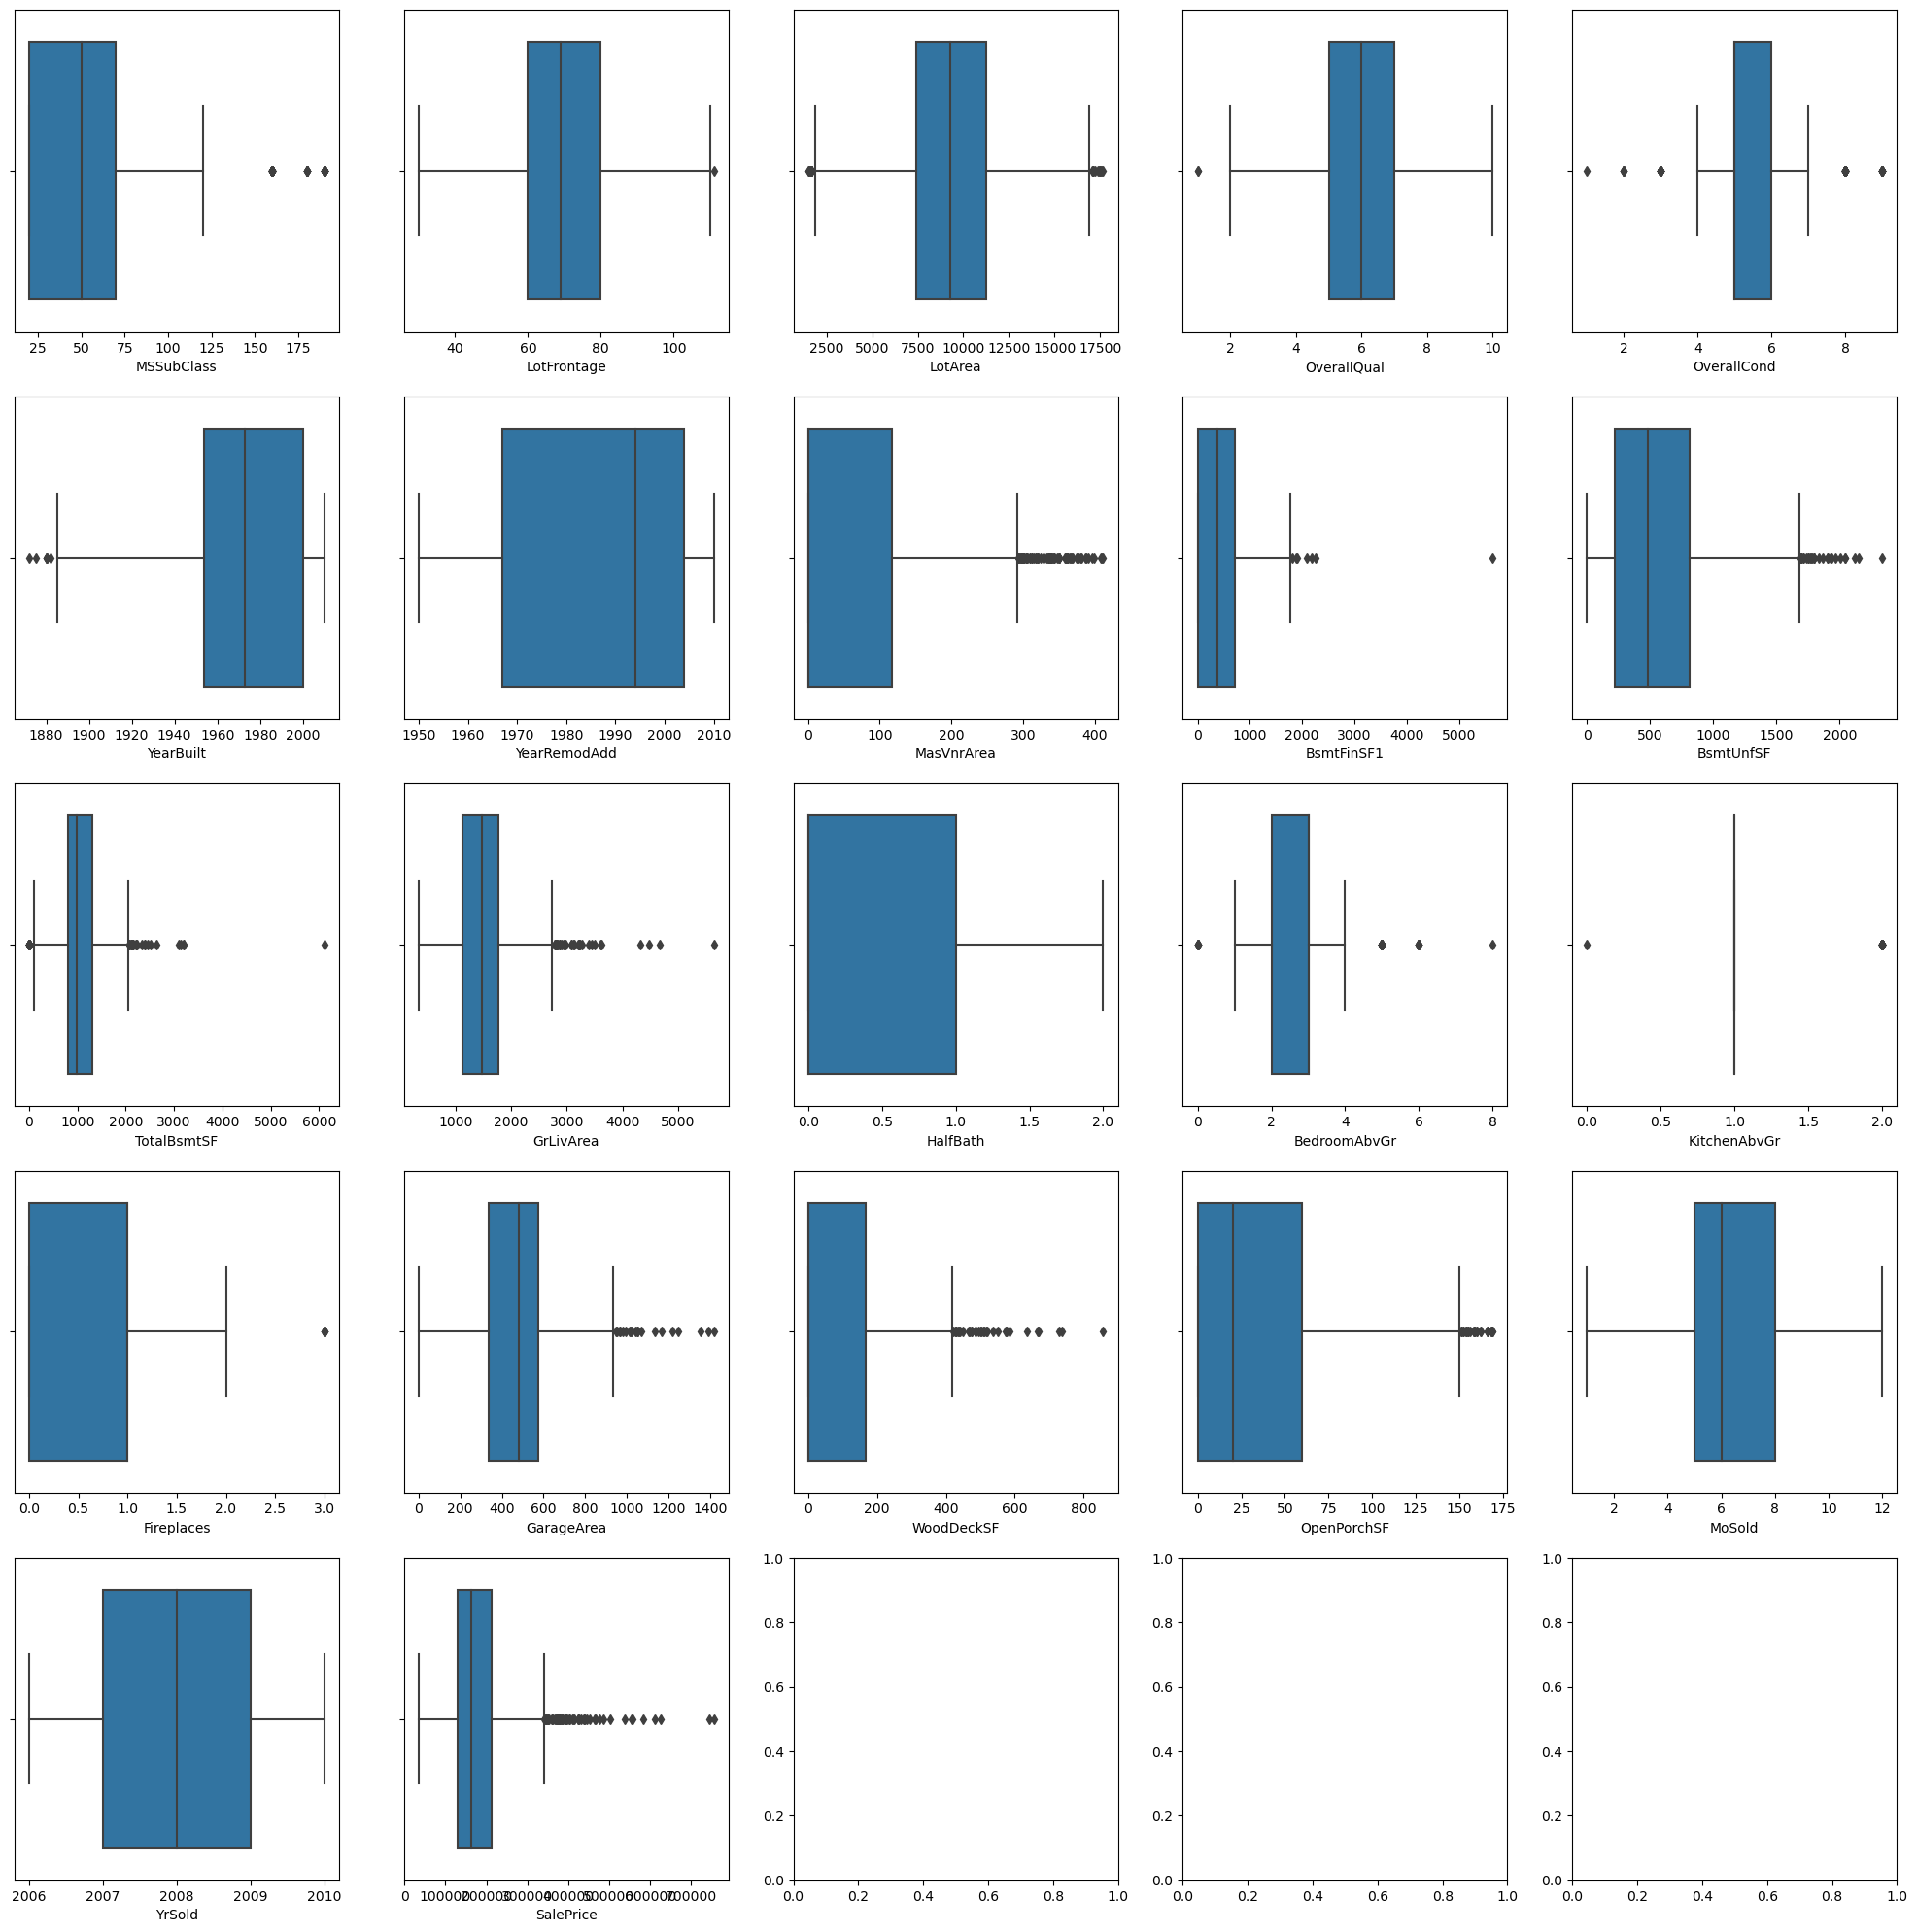

In [734]:
plotGraph(house_data.select_dtypes(exclude='object'),2)

#### - Create Dummy variables for the categorical dataset.

In [735]:
# creating dummy variables for categorical variables
categorical_data = house_data_no_outliers.select_dtypes(include='object')
categorical_data.head()

MSZoning LotShape LotConfig Neighborhood BldgType HouseStyle RoofStyle  \
0       RL      Reg    Inside      CollgCr     1Fam     2Story     Gable   
2       RL      IR1    Inside      CollgCr     1Fam     2Story     Gable   
3       RL      IR1    Corner      Crawfor     1Fam     2Story     Gable   
5       RL      IR1    Inside      Mitchel     1Fam     1.5Fin     Gable   
6       RL      Reg    Inside      Somerst     1Fam     1Story     Gable   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
5     VinylSd     VinylSd       None        TA        TA       Wood       Gd   
6     VinylSd     VinylSd      Stone        Gd        TA      PConc       Ex   

  BsmtExposure BsmtFinType1 HeatingQC CentralAir Electrical KitchenQual  \
0           No          GLQ        Ex          Y      SBrkr          Gd   
2           Mn          GLQ        Ex          Y      SBrkr          Gd   
3           No          ALQ        Gd          Y      SBrkr          Gd   
5           No          GLQ        Ex          Y      SBrkr          TA   
6           Av          GLQ        Ex          Y      SBrkr          Gd   

  FireplaceQu GarageType GarageFinish PavedDrive SaleType SaleCondition  
0         NaN     Attchd          RFn          Y       WD        Normal  
2          TA     Attchd          RFn          Y       WD        Normal  
3          Gd     Detchd          Unf          Y       WD       Abnorml  
5         NaN     Attchd          Unf          Y       WD        Normal  
6          Gd     Attchd          RFn          Y       WD        Normal

In [736]:
categorical_data = pd.get_dummies(categorical_data, drop_first=True)
categorical_data.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
5            0            0            1            0             0   
6            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0             0             1                  0              0   
2             0             0                  0              0   
3             0             0                  0              0   
5             0             0                  0              0   
6             0             1                  0              0   

   LotConfig_FR3  LotConfig_Inside  Neighborhood_BrkSide  \
0              0                 1                     0   
2              0                 1                     0   
3              0                 0                     0   
5              0                 1                     0   
6              0                 1                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
2                     0                     1                     0   
3                     0                     0                     1   
5                     0                     0                     0   
6                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
5                     0                     0                    0   
6                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
5                     0                     1                   0   
6                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
5                     0                    0                     0   
6                     0                    0                     0   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
5                     0                     0                   0   
6                     0                     0                   0   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
5                    0                     0                     0   
6                    0                     0                     1   

   Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  \
0                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
5           

In [737]:
categorical_data.shape

(969, 133)

In [738]:
#  Split X and Y

X = house_data_no_outliers.select_dtypes(exclude='object')
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0   8450.0            7            5       2003   
2          60         68.0  11250.0            7            5       2001   
3          70         60.0   9550.0            7            5       1915   
5          50         85.0  14115.0            5            5       1993   
6          20         75.0  10084.0            8            5       2004   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  GrLivArea  \
0          2003       196.0         706        150          856       1710   
2          2002       162.0         486        434          920       1786   
3          1970         0.0         216        540          756       1717   
5          1995         0.0         732         64          796       1362   
6          2005       186.0        1369        317         1686       1694   

   HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
0         1             3           1.0           0         548           0   
2         1             3           1.0           1         608           0   
3         0             3           1.0           1         642           0   
5         1             1           1.0           0         480          40   
6         0             3           1.0           1         636         255   

   OpenPorchSF  MoSold  YrSold  SalePrice  
0         61.0       2    2008     208500  
2         42.0       9    2008     223500  
3         35.0       2    2006     140000  
5         30.0      10    2009     143000  
6         57.0       8    2007     307000

In [739]:
X.shape

(969, 22)

In [740]:
# concat dummy variables with X
X = pd.concat([X, categorical_data], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0   8450.0            7            5       2003   
2          60         68.0  11250.0            7            5       2001   
3          70         60.0   9550.0            7            5       1915   
5          50         85.0  14115.0            5            5       1993   
6          20         75.0  10084.0            8            5       2004   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  GrLivArea  \
0          2003       196.0         706        150          856       1710   
2          2002       162.0         486        434          920       1786   
3          1970         0.0         216        540          756       1717   
5          1995         0.0         732         64          796       1362   
6          2005       186.0        1369        317         1686       1694   

   HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
0         1             3           1.0           0         548           0   
2         1             3           1.0           1         608           0   
3         0             3           1.0           1         642           0   
5         1             1           1.0           0         480          40   
6         0             3           1.0           1         636         255   

   OpenPorchSF  MoSold  YrSold  SalePrice  MSZoning_FV  MSZoning_RH  \
0         61.0       2    2008     208500            0            0   
2         42.0       9    2008     223500            0            0   
3         35.0       2    2006     140000            0            0   
5         30.0      10    2009     143000            0            0   
6         57.0       8    2007     307000            0            0   

   MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0            1            0             0             0             1   
2            1            0             0             0             0   
3            1            0             0             0             0   
5            1            0             0             0             0   
6            1            0             0             0             1   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
2                  0              0              0                 1   
3                  0              0              0                 0   
5                  0              0              0                 1   
6                  0              0              0                 1   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
5                     0                     0                     0   
6                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
5                     0                     0                     0   
6                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
5                    0                     0                     1   
6                    0                     0                     0   

   Neighborhood_NAmes  Neigh

In [741]:
X.shape

(969, 155)

In [742]:
y = X.pop('SalePrice')
y.head()

0    208500
2    223500
3    140000
5    143000
6    307000
Name: SalePrice, dtype: int64

#### - Checking for N/A values in dataset and removes them.

In [743]:
navalues = X.isna().sum()
navalues[navalues>0]

LotFrontage    211
LotArea         34
MasVnrArea      51
OpenPorchSF     46
dtype: int64

In [744]:
# Remove the n/a values in dataset.
X[['LotFrontage','LotArea', 'MasVnrArea', 'OpenPorchSF']] = X[['LotFrontage','LotArea', 'MasVnrArea', 'OpenPorchSF']].fillna(0)
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0   8450.0            7            5       2003   
2          60         68.0  11250.0            7            5       2001   
3          70         60.0   9550.0            7            5       1915   
5          50         85.0  14115.0            5            5       1993   
6          20         75.0  10084.0            8            5       2004   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  GrLivArea  \
0          2003       196.0         706        150          856       1710   
2          2002       162.0         486        434          920       1786   
3          1970         0.0         216        540          756       1717   
5          1995         0.0         732         64          796       1362   
6          2005       186.0        1369        317         1686       1694   

   HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
0         1             3           1.0           0         548           0   
2         1             3           1.0           1         608           0   
3         0             3           1.0           1         642           0   
5         1             1           1.0           0         480          40   
6         0             3           1.0           1         636         255   

   OpenPorchSF  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0         61.0       2    2008            0            0            1   
2         42.0       9    2008            0            0            1   
3         35.0       2    2006            0            0            1   
5         30.0      10    2009            0            0            1   
6         57.0       8    2007            0            0            1   

   MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  \
0            0             0             0             1                  0   
2            0             0             0             0                  0   
3            0             0             0             0                  0   
5            0             0             0             0                  0   
6            0             0             0             1                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_BrkSide  \
0              0              0                 1                     0   
2              0              0                 1                     0   
3              0              0                 0                     0   
5              0              0                 1                     0   
6              0              0                 1                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
2                     0                     1                     0   
3                     0                     0                     1   
5                     0                     0                     0   
6                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
5                     0                     0                    0   
6                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
5                     0                     1                   0   
6                     0                     

In [745]:
navalues = X.isna().sum()
navalues[navalues>0]

Series([], dtype: int64)

In [746]:
X.shape

(969, 154)

#### - Scaling the features

In [711]:
# Scaling the features using MinMaxScaling
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.422391     0.369983 -0.181985     0.812627    -0.635806   1.045436   
1    0.422391     0.465859  0.697723     0.812627    -0.635806   0.976088   
2    0.757468     0.210189  0.163614     0.812627    -0.635806  -2.005851   
3    0.087314     1.009157  1.597852    -0.850384    -0.635806   0.698698   
4   -0.917918     0.689570  0.331387     1.644133    -0.635806   1.080109   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  GrLivArea  \
0      0.902722    1.825460    0.699712  -1.025417    -0.620728   0.711348   
1      0.854689    1.405119    0.141720  -0.320553    -0.411274   0.896938   
2     -0.682383   -0.597685   -0.543088  -0.057471    -0.947999   0.728441   
3      0.518454   -0.597685    0.765656  -1.238861    -0.817090  -0.138462   
4      0.998789    1.701830    2.381295  -0.610937     2.095623   0.672276   

   HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
0  1.321169      0.306113           0.0   -0.969522    0.497756   -0.806414   
1  1.321169      0.306113           0.0    0.678666    0.831916   -0.806414   
2 -0.737051      0.306113           0.0    0.678666    1.021273   -0.806414   
3  1.321169     -2.675030           0.0   -0.969522    0.119042   -0.421779   
4 -0.737051      0.306113           0.0    0.678666    0.987857    1.645635   

   OpenPorchSF    MoSold    YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0     0.745073 -1.583856  0.171059    -0.196431     -0.09124     0.446383   
1     0.272397  1.013025  0.171059    -0.196431     -0.09124     0.446383   
2     0.098253 -1.583856 -1.342695    -0.196431     -0.09124     0.446383   
3    -0.026136  1.384008  0.927936    -0.196431     -0.09124     0.446383   
4     0.645562  0.642042 -0.585818    -0.196431     -0.09124     0.446383   

   MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  \
0    -0.359681       -0.1693     -0.085302      0.794552          -0.261452   
1    -0.359681       -0.1693     -0.085302     -1.258571          -0.261452   
2    -0.359681       -0.1693     -0.085302     -1.258571          -0.261452   
3    -0.359681       -0.1693     -0.085302     -1.258571          -0.261452   
4    -0.359681       -0.1693     -0.085302      0.794552          -0.261452   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_BrkSide  \
0      -0.184801      -0.045478          0.615125             -0.215491   
1      -0.184801      -0.045478          0.615125             -0.215491   
2      -0.184801      -0.045478         -1.625687             -0.215491   
3      -0.184801      -0.045478          0.615125             -0.215491   
4      -0.184801      -0.045478          0.615125             -0.215491   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0             -0.133631              2.540442             -0.181794   
1             -0.133631              2.540442             -0.181794   
2             -0.133631             -0.393632              5.500733   
3             -0.133631             -0.393632             -0.181794   
4             -0.133631             -0.393632             -0.181794   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0             -0.247662             -0.279042            -0.172498   
1             -0.247662             -0.279042            -0.172498   
2             -0.247662             -0.279042            -0.172498   
3             -0.247662             -0.279042            -0.172498   
4             -0.247662             -0.279042            -0.172498   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0             -0.032141             -0.187767           -0.451361   
1             -0.032141             -0.187767           -0.451361   
2             -0.032141             -0.187767           -0.451361   
3             -0.032141              5.325752           -0.451361   
4             

#### - Splitting the data into Training and Testing Sets

In [712]:
from sklearn.model_selection import train_test_split

# Specified the random_state so that the train and test data set always have the same rows, respectively
# Splitted with 70% train data and 30% test data.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [713]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(678, 154) (291, 154) (678,) (291,)


### Model Building and Evaluation

#### - Using Linear Regression

In [714]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 100
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=100)
rfe = rfe.fit(X_train, y_train)


In [601]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 52),
 ('LotFrontage', True, 1),
 ('LotArea', False, 11),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 8),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 31),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 2),
 ('MoSold', False, 42),
 ('YrSold', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 37),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 9),
 ('LotConfig_CulDSac', True, 1),
 ('LotConfig_FR2', True, 1),
 ('LotConfig_FR3', False, 20),
 ('LotConfig_Inside', False, 54),
 ('Neighborhood_Blueste', False, 27),
 ('Neighborhood_BrDale', False, 62),
 ('Neighborhood_BrkSide', False, 16),
 ('Neighborhoo

In [715]:
rfe_selected_cols = X_train.columns[rfe.support_]
rfe_selected_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       'GrLivArea', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'HouseStyle_2.5Unf', 'HouseStyle_2Story',
       'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st

In [716]:
# Select the columns as per RFE on Train dataset.
X_train_rfe = X_train[rfe_selected_cols]
X_train_rfe.shape

(678, 100)

In [717]:
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [718]:
# Predict
y_train_predict = lm.predict(X_train_rfe)

In [719]:
# Calculate the R2 Square.
from sklearn.metrics import r2_score
r2_score(y_train, y_train_predict)

0.937033108305239

#### - Calculate R2 score on Test data.

In [720]:
X_test_rfe = X_test[rfe_selected_cols]
X_test_rfe.shape

(291, 100)

In [721]:
# Predict Test data
y_test_predict = lm.predict(X_test_rfe)

In [722]:
# Calculate the R2 score on Test data.
r2_score(y_test, y_test_predict)

-1.9040039473721404e+22

#### R2 score is negative on Test data, we need to try Ridge and Lasso regression.

In [723]:
X_test_rfe.shape

(291, 100)

In [724]:
y_test.shape

(291,)

Text(0.5, 0, 'Errors')

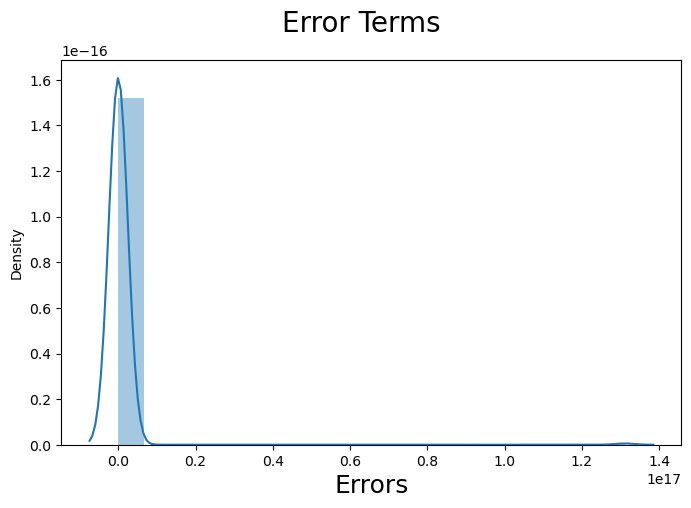

In [725]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(8, 5))
sns.distplot((y_test - y_test_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

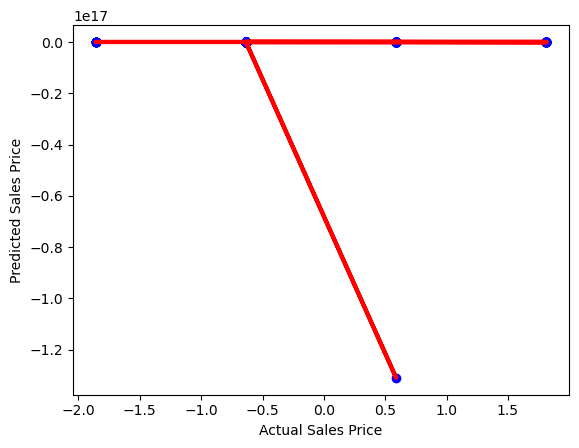

In [726]:
# Plot for Predicted Sales Price and Actual Sales Price.

# original data shown as blue points
plt.scatter(X_test_rfe.OverallCond , y_test_predict , color = 'blue') 
 # Fitted model in red
plt.plot(X_test_rfe.OverallCond, y_test_predict , color = 'red' , linewidth = 3)
plt.xlabel("Actual Sales Price")
plt.ylabel("Predicted Sales Price")
plt.show()

### Ridge Regression:

In [727]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [728]:
X_train.shape

(678, 154)

In [729]:
y_train.shape

(678,)

In [730]:
# Applying Ridge Regression with varying the hyperparameter 'lambda'

# Higher the value of alpha, more the regularization
params = {"alpha" : [0, 0.001, 0.01, 0.1, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 
           10, 20, 50, 100, 500, 1000]} 

ridge = Ridge()
folds=5

model_CV = GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_absolute_error', 
                        cv=folds, return_train_score=True, verbose=1)

model_CV.fit(X_train, y_train)


Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 0.001, 0.01, 0.1, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [642]:
CV_results = pd.DataFrame(model_CV.cv_results_)
CV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.024142  2.638403e-02         0.002985    6.336621e-04           0   
1        0.004588  7.979871e-04         0.002394    4.887530e-04       0.001   
2        0.004588  4.886166e-04         0.002593    4.886556e-04        0.01   
3        0.004588  4.890060e-04         0.002194    3.993036e-04         0.1   
4        0.004389  4.884414e-04         0.002193    3.988505e-04        0.05   
5        0.003989  2.336015e-07         0.002393    4.888891e-04         0.1   
6        0.004588  4.888696e-04         0.002194    3.988744e-04         0.2   
7        0.004388  4.886946e-04         0.002194    3.991128e-04         0.3   
8        0.004591  4.913945e-04         0.001991    6.752930e-06         0.4   
9        0.004389  4.886166e-04         0.002194    3.988267e-04         0.5   
10       0.003989  1.784161e-07         0.002194    3.990413e-04         0.6   
11       0.004388  4.887919e-04         0.002393    4.885582e-04         0.7   
12       0.004388  4.886361e-04         0.002194    3.989221e-04         0.8   
13       0.004389  4.887918e-04         0.002194    3.991366e-04         0.9   
14       0.004588  4.888113e-04         0.001994    2.431402e-07           1   
15       0.004787  7.466206e-04         0.002593    4.887530e-04           2   
16       0.004388  4.888309e-04         0.002393    4.887723e-04           3   
17       0.004189  3.990890e-04         0.001994    4.101908e-07           4   
18       0.004388  4.884609e-04         0.002194    3.991127e-04           5   
19       0.004588  7.980943e-04         0.002593    4.885972e-04           6   
20       0.005187  7.465953e-04         0.002593    4.884223e-04           7   
21       0.005186  3.987074e-04         0.002393    4.885583e-04           8   
22       0.004788  3.992800e-04         0.002194    3.991368e-04           9   
23       0.004389  4.888114e-04         0.001994    4.101908e-07          10   
24       0.004588  4.888503e-04         0.002393    4.888502e-04          20   
25       0.005386  4.884999e-04         0.002194    3.986597e-04          50   
26       0.005186  3.987552e-04         0.002593    4.885388e-04         100   
27       0.005984  1.544403e-03         0.003191    9.769606e-04         500   
28       0.004988  6.306044e-04         0.002592    4.876683e-04        1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0       {'alpha': 0}      -5.518952e+17      -6.863474e+17      -6.051862e+17   
1   {'alpha': 0.001}      -2.136185e+04      -2.113495e+04      -2.372905e+04   
2    {'alpha': 0.01}      -2.136077e+04      -2.113371e+04      -2.372850e+04   
3     {'alpha': 0.1}      -2.135003e+04      -2.112210e+04      -2.372303e+04   
4    {'alpha': 0.05}      -2.135598e+04      -2.112839e+04      -2.372607e+04   
5     {'alpha': 0.1}      -2.135003e+04      -2.112210e+04      -2.372303e+04   
6     {'alpha': 0.2}      -2.133823e+04      -2.111057e+04      -2.371696e+04   
7     {'alpha': 0.3}      -2.132676e+04      -2.110020e+04      -2.371090e+04   
8     {'alpha': 0.4}      -2.131540e+04      -2.109078e+04      -2.370485e+04   
9     {'alpha': 0.5}      -2.130414e+04      -2.108212e+04      -2.369882e+04   
10    {'alpha': 0.6}      -2.129298e+04      -2.107410e+04      -2.369281e+04   
11    {'alpha': 0.7}      -2.128216e+04      -2.106663e+04      -2.368681e+04   
12    {'alpha': 0.8}      -2.127178e+04      -2.105963e+04      -2.368084e+04   
13    {'alpha': 0.9}      -2.126145e+04      -2.105302e+04      -2.367511e+04   
14      {'alpha': 1}      -2.125117e+04      -2.104742e+04      -2.366941e+04   
15      {'alpha': 2}      -2.115162e+04      -2.101557e+04      -2.361341e+04   
16      {'alpha': 3}      -2.105765e+04      -2.098989e+04      -2.355991e+04   
17      {'alpha': 4}      -2.096854e+04      -2.097014e+04      -2.351221e+04   
18      {'alpha': 5}      -2.088362e+04      -2.095391e+04      

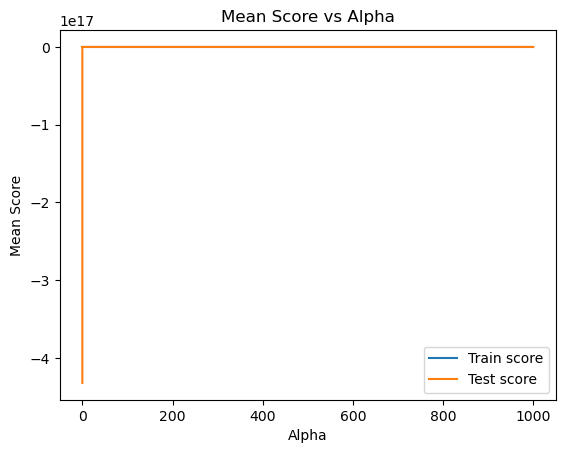

In [752]:
CV_results.param_alpha
# Plot the result to find out the appropitae alpha w.r.t bias and variance trade-off.

alpha = CV_results.param_alpha.astype('float32')

plt.plot(alpha, CV_results.mean_train_score)
plt.plot(alpha, CV_results.mean_test_score)
plt.title("Mean Score vs Alpha")
plt.xlabel("Alpha")
plt.ylabel("Mean Score")
plt.legend(["Train score","Test score"])
plt.show()